In [1]:
!pip install kaggle

In [2]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.7 MB/s eta 0:00:00


In [3]:
!mkdir -p ~/.kaggle

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohanrao/formula-1-world-championship-1950-2020")

print("Path to dataset files:", path)

100%|██████████| 6.14M/6.14M [00:00<00:00, 8.31MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/23


In [5]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
#!/bin/bash
!kaggle datasets download rohanrao/formula-1-world-championship-1950-2020

Dataset URL: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
License(s): CC0-1.0
 49% 3.00M/6.14M [00:00<00:00, 5.58MB/s]
100% 6.14M/6.14M [00:00<00:00, 8.54MB/s]


In [8]:
!unzip formula-1-world-championship-1950-2020.zip

Archive:  formula-1-world-championship-1950-2020.zip
replace circuits.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: circuits.csv            
  inflating: constructor_results.csv  
  inflating: constructor_standings.csv  
  inflating: constructors.csv        
  inflating: driver_standings.csv    
  inflating: drivers.csv             
  inflating: lap_times.csv           
  inflating: pit_stops.csv           
  inflating: qualifying.csv          
  inflating: races.csv               
  inflating: results.csv             
  inflating: seasons.csv             
  inflating: sprint_results.csv      
  inflating: status.csv              


In [9]:
import pandas as pd
import os

# List of CSV files
csv_files = [
    'circuits.csv', 'constructor_results.csv', 'constructor_standings.csv',
    'constructors.csv', 'driver_standings.csv', 'drivers.csv',
    'lap_times.csv', 'pit_stops.csv', 'qualifying.csv',
    'races.csv', 'results.csv', 'seasons.csv',
    'sprint_results.csv', 'status.csv'
]

# Dictionary to store dataframes
dataframes = {}

# Load each CSV file into a pandas dataframe
for file in csv_files:
    df_name = file.split('.')[0]
    dataframes[df_name] = pd.read_csv(file)
    print(f"Loaded {file} into dataframe '{df_name}'")

# Now you can access each dataframe using the dataframes dictionary
# For example, to access the 'circuits' dataframe:
# circuits_df = dataframes['circuits']

Loaded circuits.csv into dataframe 'circuits'
Loaded constructor_results.csv into dataframe 'constructor_results'
Loaded constructor_standings.csv into dataframe 'constructor_standings'
Loaded constructors.csv into dataframe 'constructors'
Loaded driver_standings.csv into dataframe 'driver_standings'
Loaded drivers.csv into dataframe 'drivers'
Loaded lap_times.csv into dataframe 'lap_times'
Loaded pit_stops.csv into dataframe 'pit_stops'
Loaded qualifying.csv into dataframe 'qualifying'
Loaded races.csv into dataframe 'races'
Loaded results.csv into dataframe 'results'
Loaded seasons.csv into dataframe 'seasons'
Loaded sprint_results.csv into dataframe 'sprint_results'
Loaded status.csv into dataframe 'status'


In [10]:
import pandas as pd

# Load CSV files
circuits = pd.read_csv('circuits.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
driver_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
seasons = pd.read_csv('seasons.csv')
sprint_results = pd.read_csv('sprint_results.csv')
status = pd.read_csv('status.csv')

# Print confirmation messages
print("Loaded circuits.csv into dataframe 'circuits'")
print("Loaded constructor_results.csv into dataframe 'constructor_results'")
print("Loaded constructor_standings.csv into dataframe 'constructor_standings'")
print("Loaded constructors.csv into dataframe 'constructors'")
print("Loaded driver_standings.csv into dataframe 'driver_standings'")
print("Loaded drivers.csv into dataframe 'drivers'")
print("Loaded lap_times.csv into dataframe 'lap_times'")
print("Loaded pit_stops.csv into dataframe 'pit_stops'")
print("Loaded qualifying.csv into dataframe 'qualifying'")
print("Loaded races.csv into dataframe 'races'")
print("Loaded results.csv into dataframe 'results'")
print("Loaded seasons.csv into dataframe 'seasons'")
print("Loaded sprint_results.csv into dataframe 'sprint_results'")
print("Loaded status.csv into dataframe 'status'")

Loaded circuits.csv into dataframe 'circuits'
Loaded constructor_results.csv into dataframe 'constructor_results'
Loaded constructor_standings.csv into dataframe 'constructor_standings'
Loaded constructors.csv into dataframe 'constructors'
Loaded driver_standings.csv into dataframe 'driver_standings'
Loaded drivers.csv into dataframe 'drivers'
Loaded lap_times.csv into dataframe 'lap_times'
Loaded pit_stops.csv into dataframe 'pit_stops'
Loaded qualifying.csv into dataframe 'qualifying'
Loaded races.csv into dataframe 'races'
Loaded results.csv into dataframe 'results'
Loaded seasons.csv into dataframe 'seasons'
Loaded sprint_results.csv into dataframe 'sprint_results'
Loaded status.csv into dataframe 'status'


# Circuits Analysis

77 unique circuits
35 countries have hosted F1 races


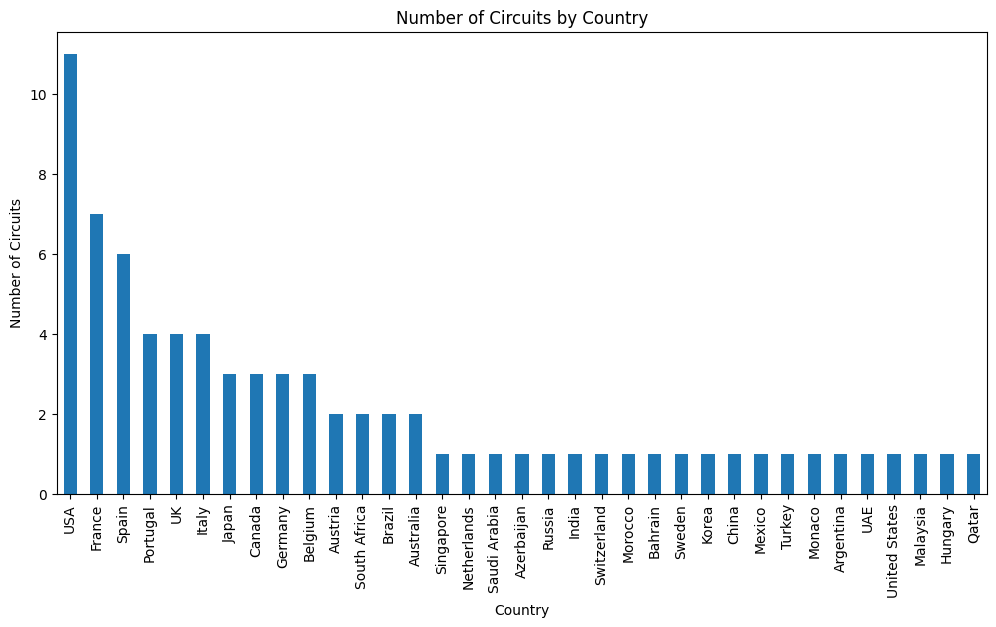

In [11]:
print(circuits['name'].nunique(), "unique circuits")
print(circuits['country'].nunique(), "countries have hosted F1 races")

plt.figure(figsize=(12, 6))
circuits['country'].value_counts().plot(kind='bar')
plt.title('Number of Circuits by Country')
plt.xlabel('Country')
plt.ylabel('Number of Circuits')
plt.show()

    circuitId  milliseconds                                name
32         70  74218.468968                       Red Bull Ring
18         19  78880.697202         Indianapolis Motor Speedway
7           8  81948.936197       Circuit de Nevers Magny-Cours
17         18  84886.007861          Autódromo José Carlos Pace
35         75  85383.201027  Autódromo Internacional do Algarve
24         26  87072.146468                   Circuito de Jerez
26         32  87485.438441        Autódromo Hermanos Rodríguez
10         11  87633.211944                         Hungaroring
5           6  88443.819108                   Circuit de Monaco
3           4  88472.746401      Circuit de Barcelona-Catalunya
25         27  88531.929907                Autódromo do Estoril
9          10  89167.087747                      Hockenheimring
6           7  89785.810283           Circuit Gilles Villeneuve
20         21  90767.423885       Autodromo Enzo e Dino Ferrari
13         14  91155.638837        Autod

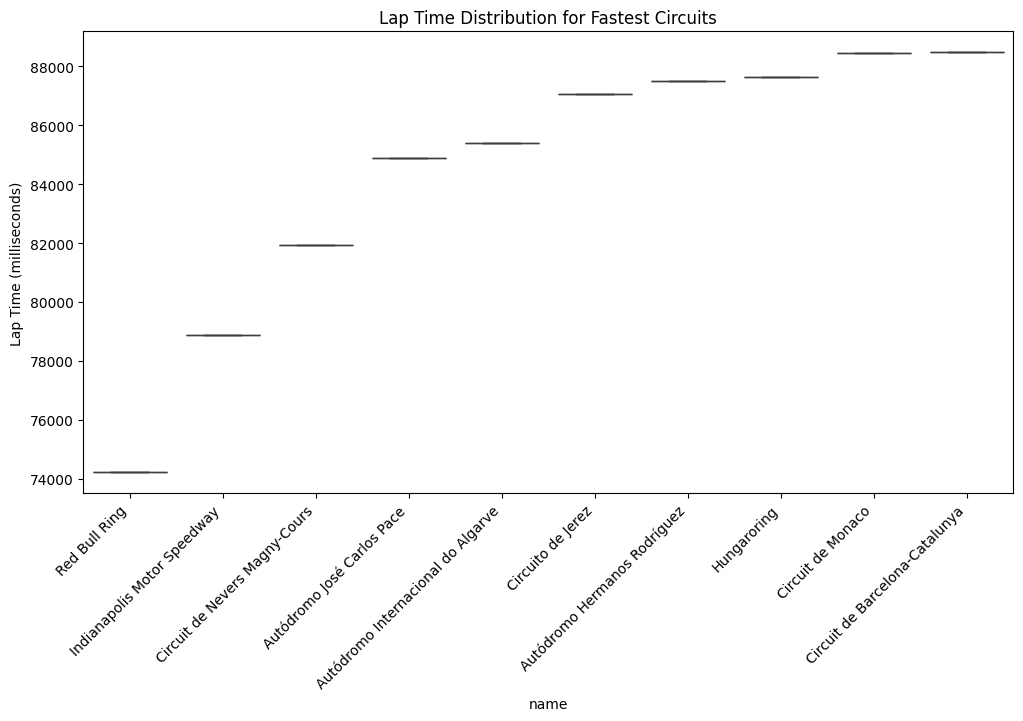

In [12]:
#### How different circuits affect race outcomes
# Calculate average lap times for each circuit
circuit_lap_times = lap_times.merge(races[['raceId', 'circuitId']], on='raceId')
circuit_lap_times = circuit_lap_times.groupby('circuitId')['milliseconds'].mean().reset_index()

# Merge with circuit names
circuit_lap_times = circuit_lap_times.merge(circuits[['circuitId', 'name']], on='circuitId')

# Display circuits with fastest average lap times
print(circuit_lap_times.sort_values('milliseconds').head(20))

# Visualize lap times distribution for top 10 fastest circuits
plt.figure(figsize=(12, 6))
sns.boxplot(x='name', y='milliseconds', data=circuit_lap_times.sort_values('milliseconds').head(10))
plt.title('Lap Time Distribution for Fastest Circuits')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Lap Time (milliseconds)')
plt.show()

# Race Analysis

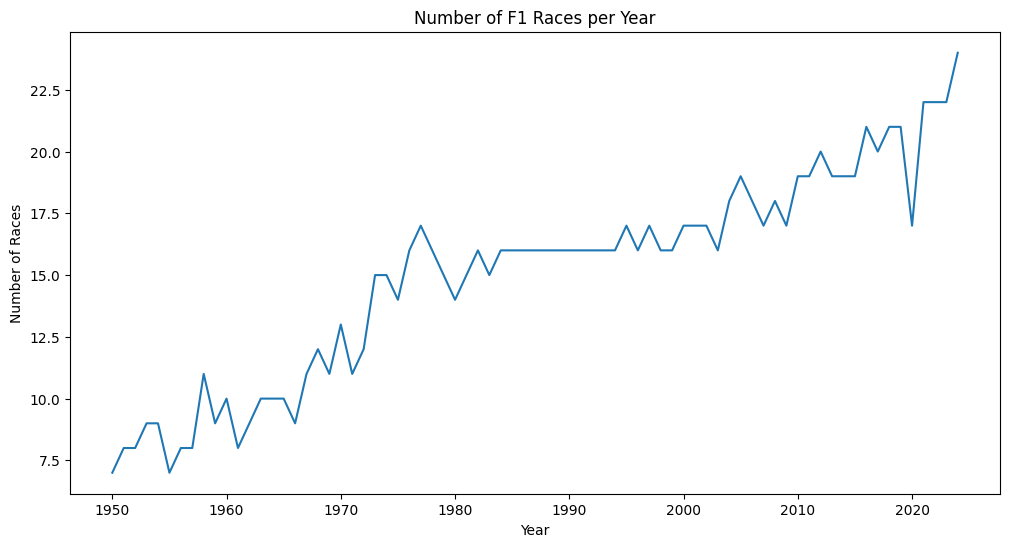

In [13]:
races_per_year = races.groupby('year').size()
plt.figure(figsize=(12, 6))
plt.plot(races_per_year.index, races_per_year.values)
plt.title('Number of F1 Races per Year')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.show()

# Driver Performance

In [14]:
print(results['position'].value_counts())
print(results['driverId'].nunique())

position
\N    10928
3      1123
4      1123
2      1121
5      1119
1      1116
6      1112
7      1092
8      1064
9      1026
10      966
11      889
12      788
13      701
14      593
15      516
16      422
17      326
18      215
19      135
20       71
21       34
22       19
23        8
24        3
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
33        1
Name: count, dtype: int64
859


In [15]:
print(results.head())
print(results.columns)

   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3 

In [16]:
print(results['position'].unique())

['1' '2' '3' '4' '5' '6' '7' '8' '\\N' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33']


     driverId  wins   forename     surname
0           1   104      Lewis    Hamilton
15         30    91    Michael  Schumacher
107       830    61        Max  Verstappen
11         20    53  Sebastian      Vettel
29        117    51      Alain       Prost
27        102    41     Ayrton       Senna
2           4    32   Fernando      Alonso
26         95    31      Nigel     Mansell
64        328    27     Jackie     Stewart
73        373    25        Jim       Clark


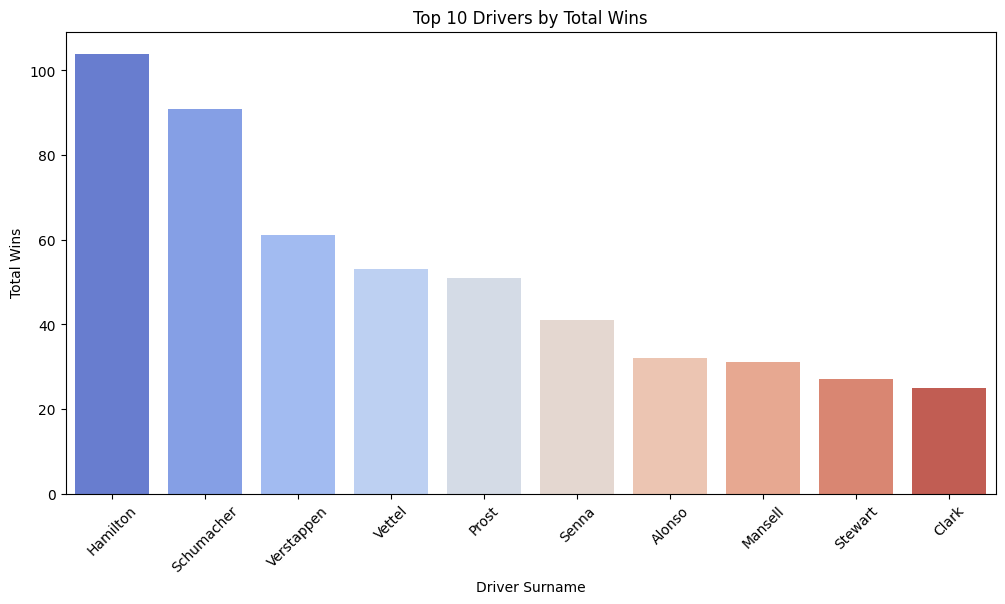

In [17]:
driver_wins = results[results['position'] == '1'].groupby('driverId').size().reset_index(name='wins')
driver_wins = driver_wins.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')

top_driver_wins = driver_wins.sort_values(by='wins', ascending=False).head(10)
print(top_driver_wins)

plt.figure(figsize=(12, 6))
sns.barplot(x='surname', y='wins', data=top_driver_wins, palette="coolwarm")
plt.title('Top 10 Drivers by Total Wins')
plt.xlabel('Driver Surname')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()

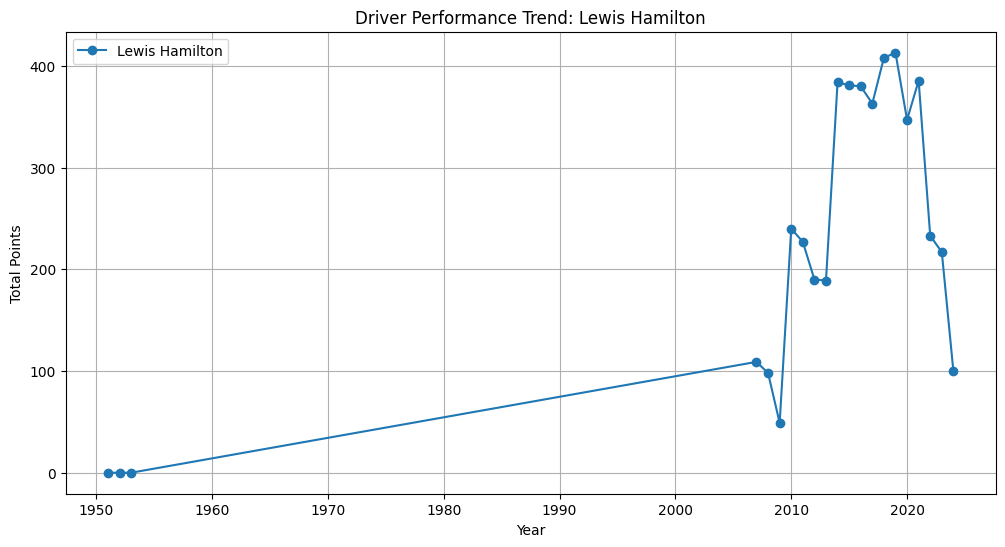

In [18]:
results_with_year = results.merge(races[['raceId', 'year']], on='raceId')
yearly_driver_points = results_with_year.groupby(['year', 'driverId'])['points'].sum().reset_index()
yearly_driver_points = yearly_driver_points.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')
hamilton_points = yearly_driver_points[yearly_driver_points['surname'] == 'Hamilton']

plt.figure(figsize=(12, 6))
plt.plot(hamilton_points['year'], hamilton_points['points'], marker='o', label='Lewis Hamilton')
plt.title("Driver Performance Trend: Lewis Hamilton")
plt.xlabel("Year")
plt.ylabel("Total Points")
plt.legend()
plt.grid(True)
plt.show()

# Constructor Performance

In [19]:
print(results['position'].value_counts())
print(results['constructorId'].nunique())

position
\N    10928
3      1123
4      1123
2      1121
5      1119
1      1116
6      1112
7      1092
8      1064
9      1026
10      966
11      889
12      788
13      701
14      593
15      516
16      422
17      326
18      215
19      135
20       71
21       34
22       19
23        8
24        3
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
33        1
Name: count, dtype: int64
211


In [20]:
constructor_wins = results[results['position'] == '1'].groupby('constructorId').size()

In [21]:
print(constructor_wins)

constructorId
1      180
2        1
3      114
4       35
5        1
6      246
9      120
11       3
17       4
22      27
23       8
24       1
25      23
27       9
32      45
34      23
37       3
51      11
58       1
59       3
64       1
66      17
67       1
87       2
95       1
105      9
107      3
108      2
113      5
114      1
118     10
131    127
167      2
170     12
172     22
176      1
180     11
182      2
183      2
187      4
190      1
191      8
196      9
208      2
211      1
213      1
214      1
dtype: int64


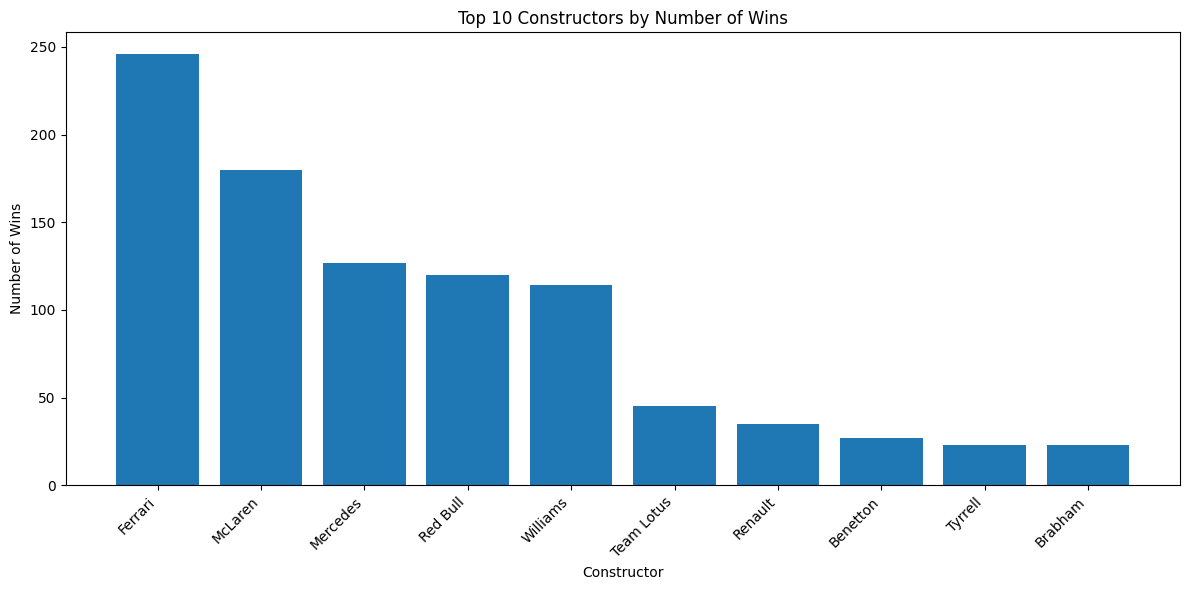

In [22]:
constructor_wins = results[results['position'] == '1'].groupby('constructorId').size().reset_index(name='wins')
constructor_wins = constructor_wins.merge(constructors[['constructorId', 'name']], on='constructorId')
top_constructors = constructor_wins.sort_values('wins', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_constructors['name'], top_constructors['wins'])
plt.title('Top 10 Constructors by Number of Wins')
plt.xlabel('Constructor')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

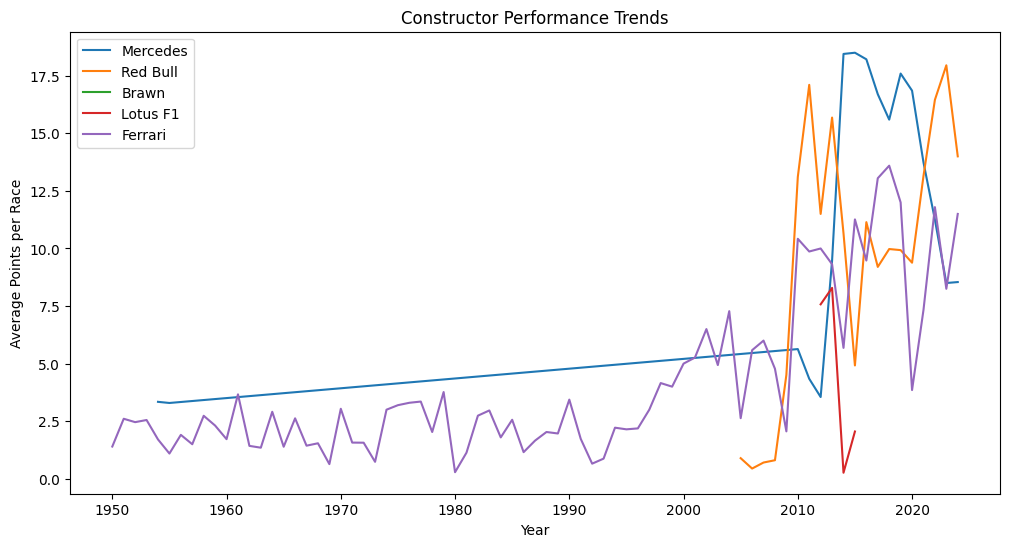

In [23]:
constructor_performance = results.merge(races[['raceId', 'year']], on='raceId')
constructor_performance = constructor_performance.groupby(['constructorId', 'year'])['points'].mean().reset_index()
constructor_performance = constructor_performance.merge(constructors[['constructorId', 'name']], on='constructorId')

top_constructors = constructor_performance.groupby('name')['points'].mean().nlargest(5).index
plt.figure(figsize=(12, 6))
for constructor in top_constructors:
    data = constructor_performance[constructor_performance['name'] == constructor]
    plt.plot(data['year'], data['points'], label=constructor)

plt.title('Constructor Performance Trends')
plt.xlabel('Year')
plt.ylabel('Average Points per Race')
plt.legend()
plt.show()

#Lap Time Analysis

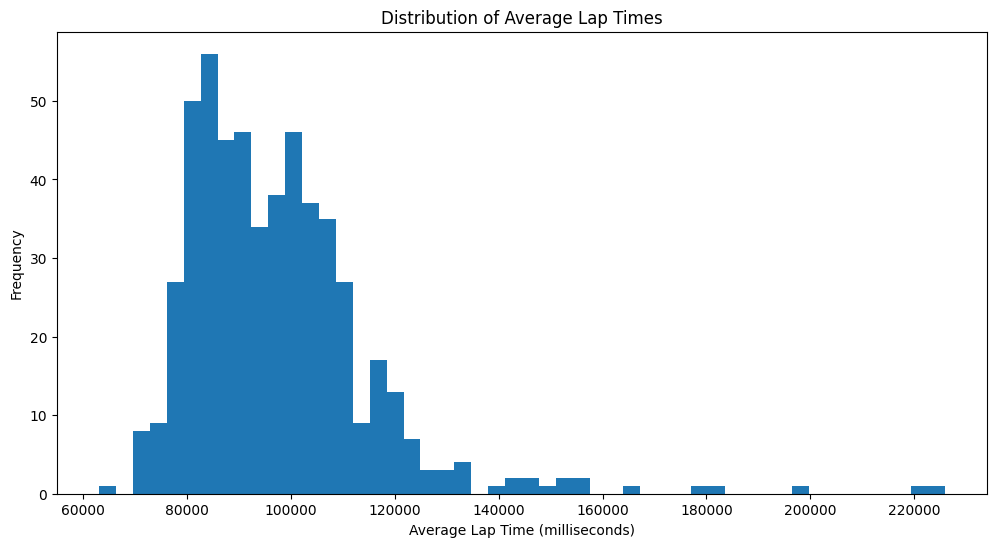

In [24]:
average_lap_times = lap_times.groupby('raceId')['milliseconds'].mean()

plt.figure(figsize=(12, 6))
plt.hist(average_lap_times, bins=50)
plt.title('Distribution of Average Lap Times')
plt.xlabel('Average Lap Time (milliseconds)')
plt.ylabel('Frequency')
plt.show()

# Altitude Analysis

altitude_category
Low       2.014390
Medium    1.805972
High      1.454135
Name: points, dtype: float64


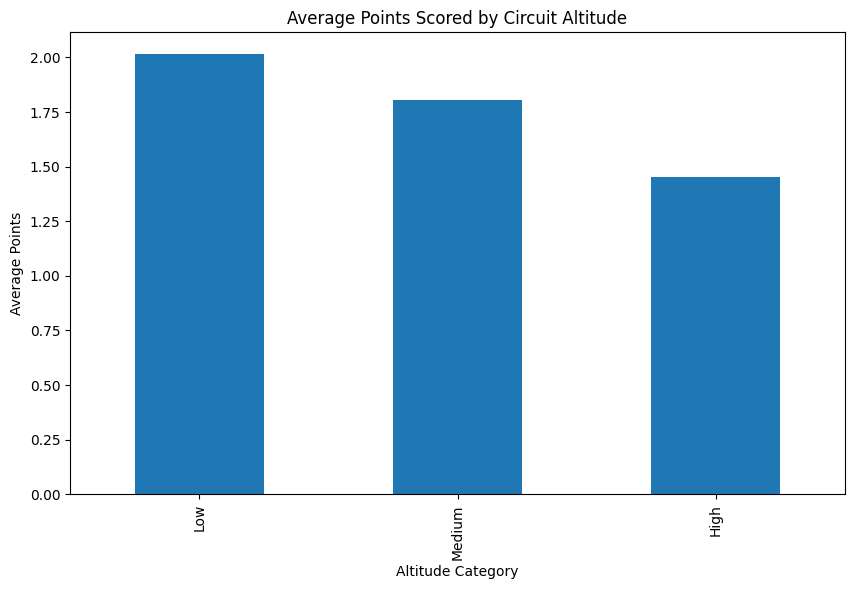

In [25]:
circuits['altitude_category'] = pd.cut(circuits['alt'],
                                       bins=[-float('inf'), 500, 1000, float('inf')],
                                       labels=['Low', 'Medium', 'High'])

altitude_performance = results.merge(races, on='raceId').merge(circuits[['circuitId', 'altitude_category']], on='circuitId')
avg_points_by_altitude = altitude_performance.groupby('altitude_category')['points'].mean().sort_values(ascending=False)

print(avg_points_by_altitude)

plt.figure(figsize=(10, 6))
avg_points_by_altitude.plot(kind='bar')
plt.title('Average Points Scored by Circuit Altitude')
plt.xlabel('Altitude Category')
plt.ylabel('Average Points')
plt.show()

# Engine Performance at Altitude

In [26]:
print(altitude_performance.columns)

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name',
       'date', 'time_y', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'altitude_category'],
      dtype='object')


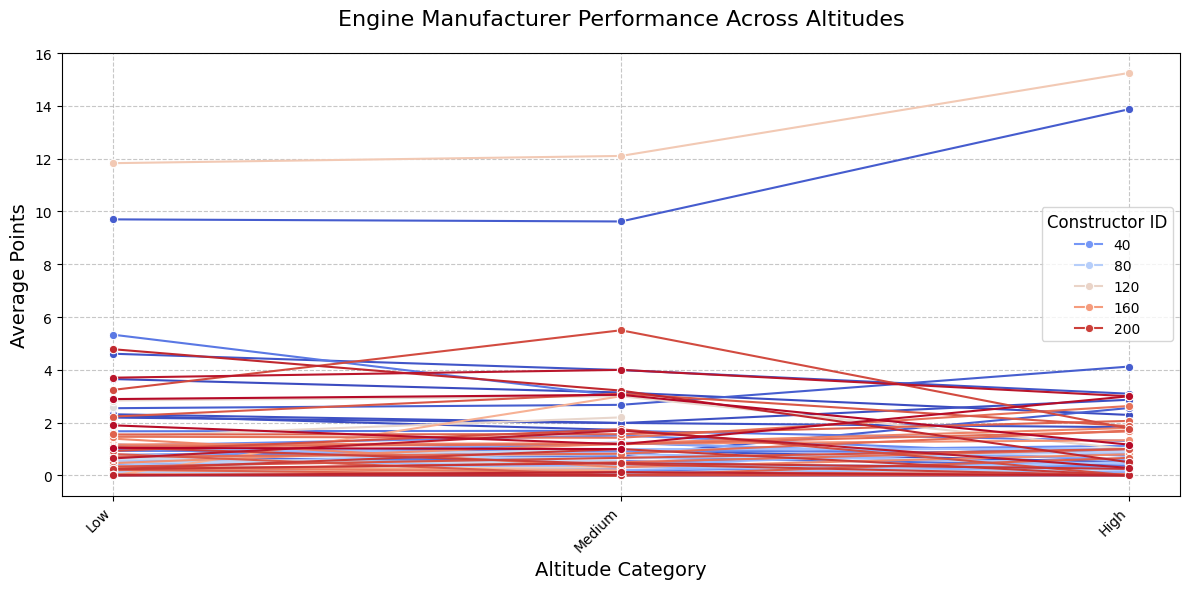

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and prepare the data
engine_altitude_performance = altitude_performance.groupby(
    ['constructorId', 'altitude_category']
)['points'].mean().reset_index()

# Plot line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=engine_altitude_performance,
    x='altitude_category',
    y='points',
    hue='constructorId',
    marker='o',
    palette='coolwarm'
)

# Add titles and labels
plt.title("Engine Manufacturer Performance Across Altitudes", fontsize=16, pad=20)
plt.xlabel("Altitude Category", fontsize=14)
plt.ylabel("Average Points", fontsize=14)
plt.legend(title="Constructor ID", fontsize=10, title_fontsize=12)

# Enhance x-axis labels
plt.xticks(rotation=45, ha="right")

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Driver Performance Trajectory

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1600x1000 with 0 Axes>

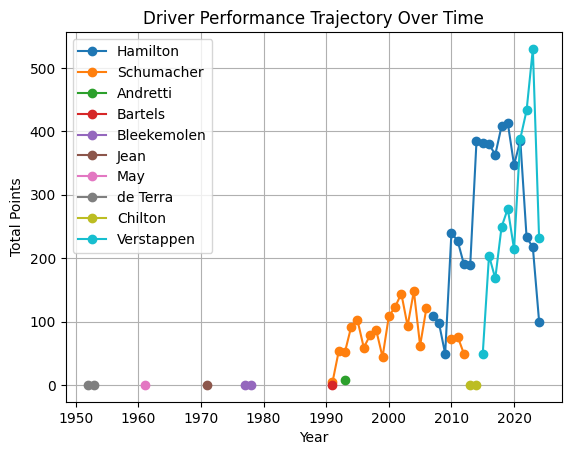

In [29]:
results = pd.read_csv('results.csv')
drivers = pd.read_csv('drivers.csv')
races = pd.read_csv('races.csv')

df = results.merge(drivers, on='driverId').merge(races, on='raceId')
top_drivers = ['Lewis Hamilton', 'Michael Schumacher', 'Max Verstappen']
driver_ids = drivers[drivers['forename'].isin(['Lewis', 'Michael', 'Max'])]['driverId'].tolist()

performance_trend = df[df['driverId'].isin(driver_ids)].groupby(['year', 'driverId'])['points'].sum().unstack()

plt.figure(figsize=(16, 10))
performance_trend.plot(marker='o')
plt.title('Driver Performance Trajectory Over Time')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.legend(drivers.loc[drivers['driverId'].isin(driver_ids), 'surname'])
plt.grid()
plt.show()

# Impact of Regulation Changes:

Assuming we have a list of regulation changes, we can analyze lap times or points before and after these changes

Average Lap Time Before Regulation Change: 95540.60045752327 ms
Average Lap Time After Regulation Change: 97380.67620802377 ms


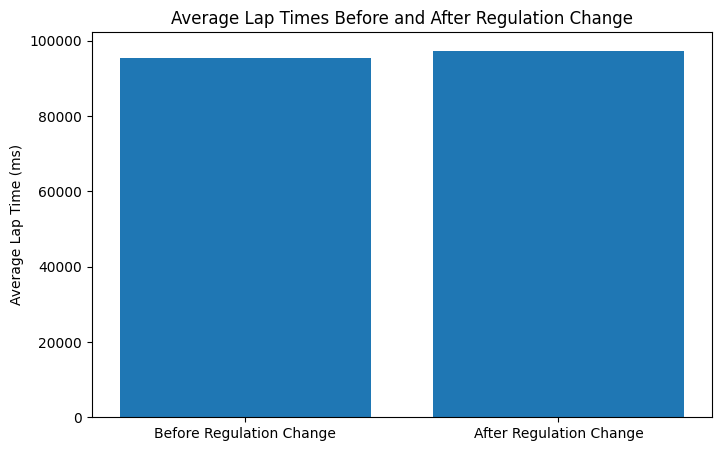

In [30]:
regulation_years = [2019, 2021]

lap_times = pd.read_csv('lap_times.csv')
lap_times_with_races = lap_times.merge(races[['raceId', 'year']], on='raceId')

before_regulation = lap_times_with_races[lap_times_with_races['year'] < regulation_years[1]]
after_regulation = lap_times_with_races[lap_times_with_races['year'] >= regulation_years[1]]

avg_lap_time_before = before_regulation['milliseconds'].mean()
avg_lap_time_after = after_regulation['milliseconds'].mean()

print(f"Average Lap Time Before Regulation Change: {avg_lap_time_before} ms")
print(f"Average Lap Time After Regulation Change: {avg_lap_time_after} ms")

labels = ['Before Regulation Change', 'After Regulation Change']
values = [avg_lap_time_before, avg_lap_time_after]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.title('Average Lap Times Before and After Regulation Change')
plt.ylabel('Average Lap Time (ms)')
plt.show()

# Nationality Trends

<Figure size 1400x800 with 0 Axes>

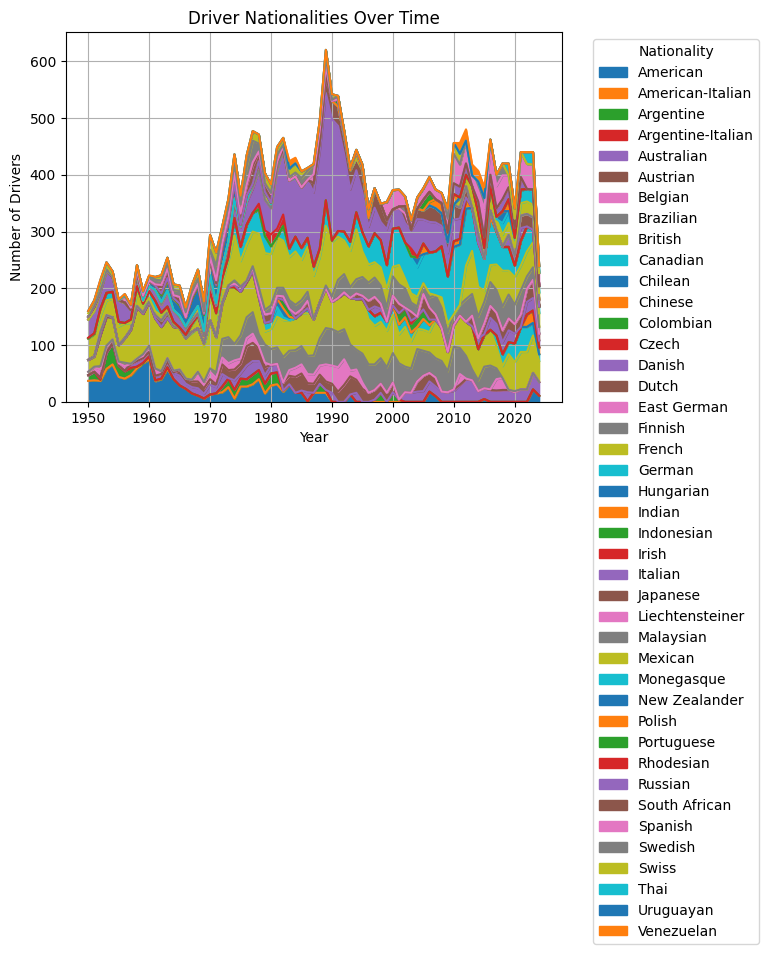

In [31]:
nationality_trends = df.groupby(['year', 'nationality']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
nationality_trends.plot(kind='area', stacked=True)
plt.title('Driver Nationalities Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Drivers')
plt.legend(title='Nationality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Qualifying vs Race Performance

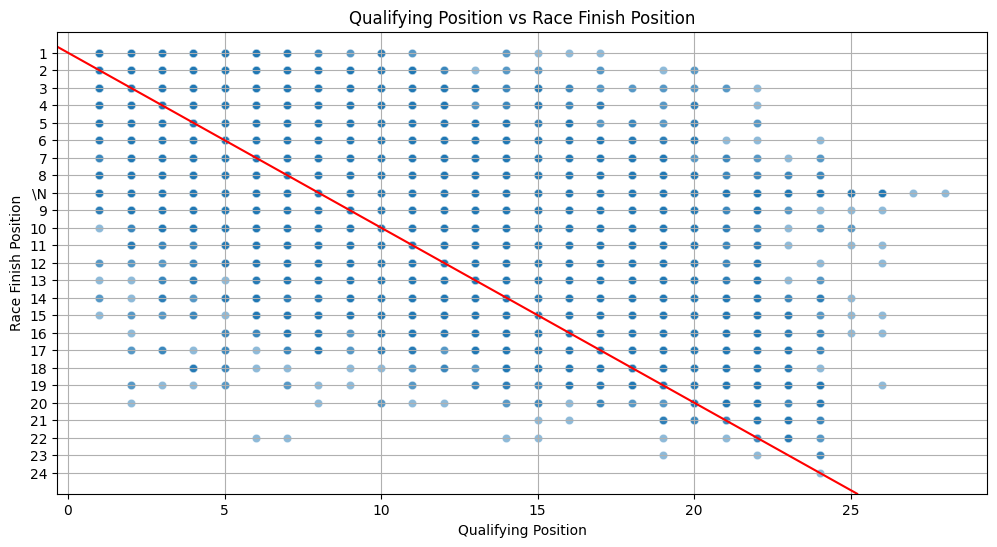

In [32]:
qualifying_results = pd.read_csv('qualifying.csv')

qualifying_vs_race = results.merge(qualifying_results[['raceId', 'driverId', 'position']], on=['raceId', 'driverId'], suffixes=('_race', '_qual'))

plt.figure(figsize=(12, 6))
sns.scatterplot(data=qualifying_vs_race, x='position_qual', y='position_race', alpha=0.5)
plt.title('Qualifying Position vs Race Finish Position')
plt.xlabel('Qualifying Position')
plt.ylabel('Race Finish Position')
plt.axline((1, 1), slope=1, color='red')  # Line indicating perfect correlation
plt.grid()
plt.show()

Here we analyze how the qualifying positions play an impact on the race results.

The scatter plot illustrates the relationship between a driver's qualifying position and their race finish position, revealing a strong correlation between the two. The red line represents a perfect correlation, where qualifying position matches race finish position, and most data points cluster closely around this line. This indicates that drivers who secure better qualifying positions (closer to position 1) are far more likely to achieve strong race results. Specifically, drivers starting in the top positions 1 to 5 consistently finish higher, underscoring the importance of qualifying well. As qualifying positions worsen (e.g., positions 10 to 20), the spread of race results increases, showing greater variability and unpredictability in outcomes. This suggests that drivers starting further back face challenges such as traffic, overtaking, and race incidents, reducing their chances of strong finishes.

# Reliability Improvements

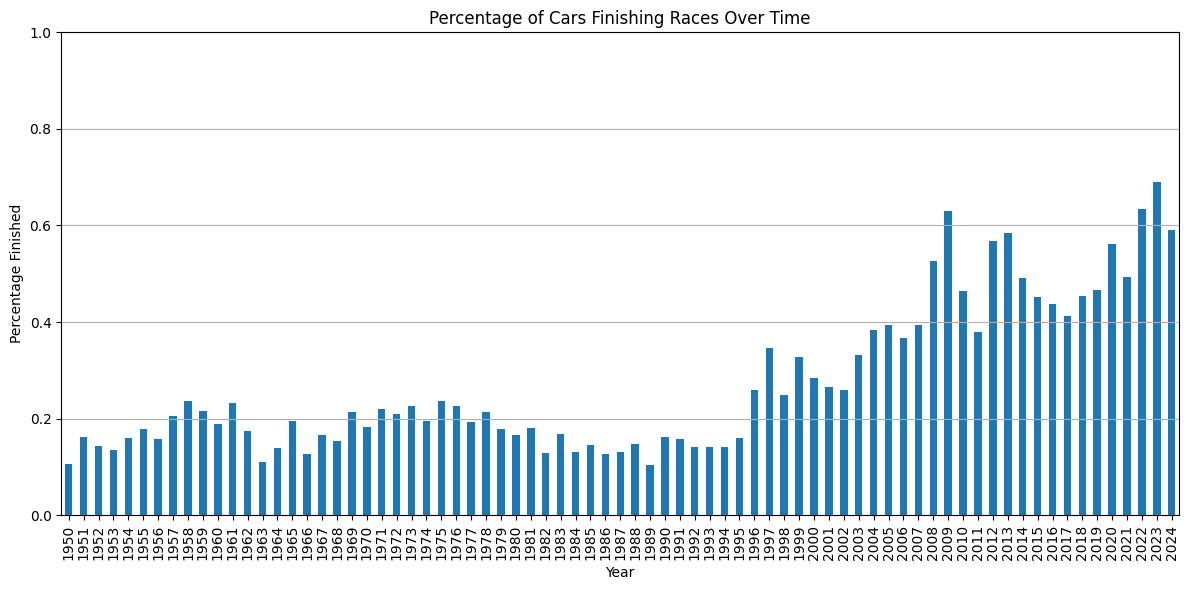

In [33]:
results_with_year = results.merge(races[['raceId', 'year']], on='raceId')
results_with_year['Finished'] = (results_with_year['statusId'] == 1).astype(int)

finishing_data = results_with_year.groupby('year')['Finished'].mean() #percentage of finished races per year

plt.figure(figsize=(12, 6))
finishing_data.plot(kind='bar')
plt.title("Percentage of Cars Finishing Races Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage Finished")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The bar chart highlights the significant improvements in car reliability in F1 over the decades. In the earlier years (1950s–1970s), the percentage of cars finishing races was relatively low, fluctuating around 10–30%. This suggests that mechanical failures, accidents, or other issues were common, likely due to the limitations of technology, materials, and safety standards during that era.

From the 1980s onward, a gradual improvement in race finishes is observed, indicating advancements in automotive engineering, reliability, and maintenance practices. The sharp upward trend from the 2000s onwards is particularly notable, with the percentage of cars finishing races consistently exceeding 50%.

In recent years (2010s–2020s), the percentage of finished races has approached 80–90%, indicating that modern race cars are more reliable than ever. This trend underscores how technological innovation, stricter regulations, and better understanding of race dynamics have contributed to minimizing breakdowns and improving race completion rates. Overall, the chart clearly demonstrates a long term positive trajectory in car reliability, reflecting the evolution of motorsport engineering and safety standards.








# Age and Experience Factor

In [34]:
drivers_file_path = '/content/drivers.csv'
results_file_path = '/content/results.csv'
races_file_path = '/content/races.csv'

drivers_df = pd.read_csv(drivers_file_path)
results_df = pd.read_csv(results_file_path)
races_df = pd.read_csv(races_file_path)

results_df = results_df.merge(races_df[['raceId', 'year']], on='raceId', how='left')
drivers_df['dob'] = pd.to_datetime(drivers_df['dob'])
results_df['Year'] = results_df['year']
merged_df = results_df.merge(drivers_df, on='driverId')
merged_df['raceDate'] = pd.to_datetime(merged_df['Year'].astype(str), format='%Y', errors='coerce')
merged_df['age'] = merged_df['raceDate'].dt.year - merged_df['dob'].dt.year
analysis_df = merged_df[['driverId', 'Year', 'forename', 'surname', 'age', 'points', 'positionOrder', 'fastestLapTime']]

print(analysis_df.head(10))

   driverId  Year   forename     surname  age  points  positionOrder  \
0         1  2008      Lewis    Hamilton   23    10.0              1   
1         2  2008       Nick    Heidfeld   31     8.0              2   
2         3  2008       Nico     Rosberg   23     6.0              3   
3         4  2008   Fernando      Alonso   27     5.0              4   
4         5  2008     Heikki  Kovalainen   27     4.0              5   
5         6  2008     Kazuki    Nakajima   23     3.0              6   
6         7  2008  Sébastien    Bourdais   29     2.0              7   
7         8  2008       Kimi   Räikkönen   29     1.0              8   
8         9  2008     Robert      Kubica   24     0.0              9   
9        10  2008       Timo       Glock   26     0.0             10   

  fastestLapTime  
0       1:27.452  
1       1:27.739  
2       1:28.090  
3       1:28.603  
4       1:27.418  
5       1:29.639  
6       1:29.534  
7       1:27.903  
8       1:28.753  
9       1:29.558 

In [35]:
analysis_df = analysis_df.dropna(subset=['age', 'points', 'positionOrder'])
sns.set(style="whitegrid")

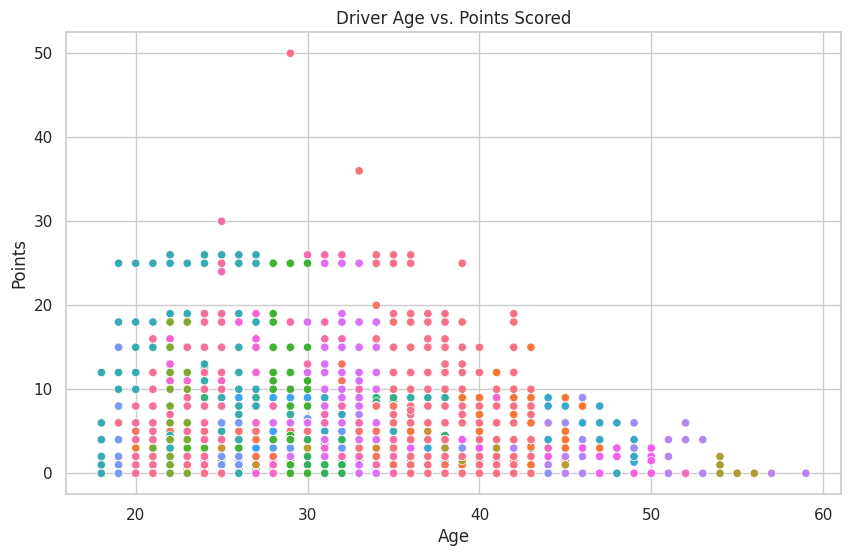

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='points', data=analysis_df, hue='forename', legend=False)
plt.title("Driver Age vs. Points Scored")
plt.xlabel("Age")
plt.ylabel("Points")
plt.show()

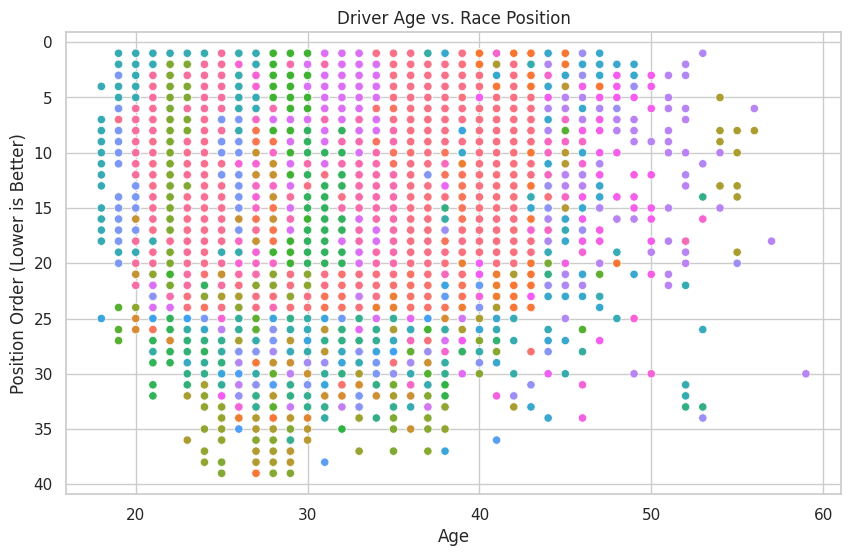

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='positionOrder', data=analysis_df, hue='forename', legend=False)
plt.title("Driver Age vs. Race Position")
plt.xlabel("Age")
plt.ylabel("Position Order (Lower is Better)")
plt.gca().invert_yaxis()  # Invert y-axis since lower positions are better
plt.show()

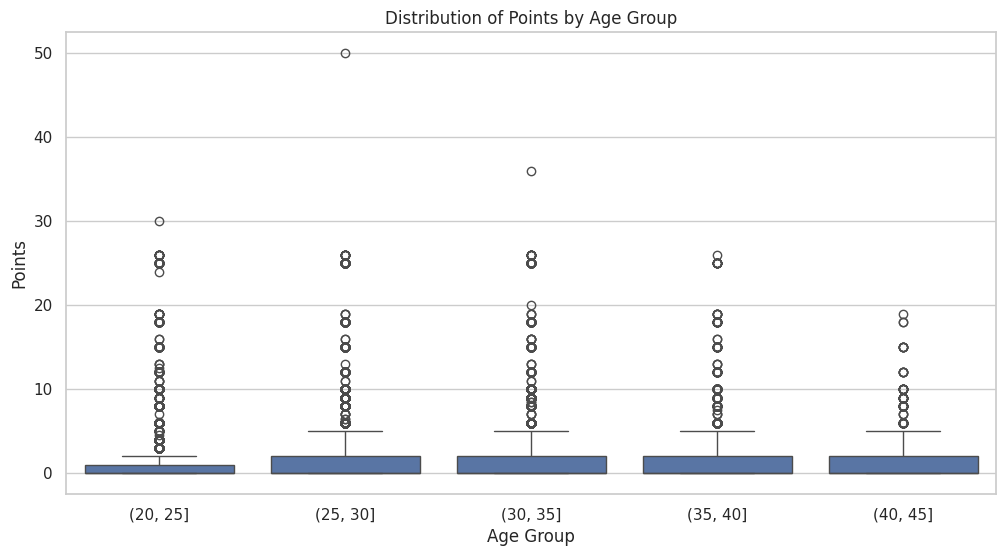

In [38]:
# 3. Box Plot: Group Age and Compare Points
plt.figure(figsize=(12, 6))
age_bins = pd.cut(analysis_df['age'], bins=range(20, 50, 5))  # Bin ages into 5-year intervals
sns.boxplot(x=age_bins, y='points', data=analysis_df)
plt.title("Distribution of Points by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Points")
plt.show()

We can observe the relationship between a driver's age and their performance in terms of points scored and race position. The first scatter plot (Driver Age vs. Points Scored) shows that younger drivers, typically between the ages of 20 and 35, tend to score higher points more frequently, with a noticeable decline in performance as age increases. The second scatter plot (Driver Age vs. Race Position) highlights that younger drivers (20–35) also achieve better race positions, clustering more towards the top positions (lower numbers), while older drivers experience greater variability and tend to finish in lower positions. Lastly, the box plot (Distribution of Points by Age Group) reinforces this trend by showing that drivers aged 20–35 generally have higher point distributions, with a few outliers achieving exceptional results. This suggests that peak driver performance occurs during the younger age ranges, likely due to physical conditioning, reflexes, and competitive opportunities, while older drivers face a gradual decline in performance. Overall, age appears to be a significant factor in determining a driver's consistency and success in scoring points and finishing in top positions.

## **Street Circuit Analysis**

In [39]:
track_ids = [6, 15, 73]
filtered_results = results_df[results_df['raceId'].isin(track_ids)]

def lap_time_to_seconds(lap_time):
    if pd.isnull(lap_time) or lap_time == '\\N':
        return np.nan
    minutes, seconds = lap_time.split(':')
    return int(minutes) * 60 + float(seconds)

filtered_results['fastestLapTimeSec'] = filtered_results['fastestLapTime'].apply(lap_time_to_seconds)
filtered_results = filtered_results.dropna(subset=['fastestLapTimeSec'])
merged_results = filtered_results.merge(drivers_df, on='driverId')

top_performers = (
    merged_results.groupby('raceId')
    .apply(lambda x: x.nsmallest(5, 'fastestLapTimeSec'))  # Top 5 performers per track
    .reset_index(drop=True)
)

top_performers = top_performers[['raceId', 'forename', 'surname', 'fastestLapTime', 'fastestLapTimeSec']]
print("Top Performers in Street Circuits (Track IDs 6, 15, 73):")
print(top_performers)
top_performers.to_csv("top_street_circuit_performers.csv", index=False)

Top Performers in Street Circuits (Track IDs 6, 15, 73):
    raceId   forename     surname fastestLapTime  fastestLapTimeSec
0        6     Felipe       Massa       1:15.154             75.154
1        6     Jenson      Button       1:15.190             75.190
2        6       Mark      Webber       1:15.321             75.321
3        6   Fernando      Alonso       1:15.371             75.371
4        6       Kimi   Räikkönen       1:15.382             75.382
5       15       Mark      Webber       1:32.569             92.569
6       15  Sebastian      Vettel       1:32.572             92.572
7       15       Kimi   Räikkönen       1:32.999             92.999
8       15      Jarno      Trulli       1:33.152             93.152
9       15     Jenson      Button       1:33.251             93.251
10      73      Pedro  de la Rosa       1:31.447             91.447
11      73   Fernando      Alonso       1:31.713             91.713
12      73       Kimi   Räikkönen       1:31.822           

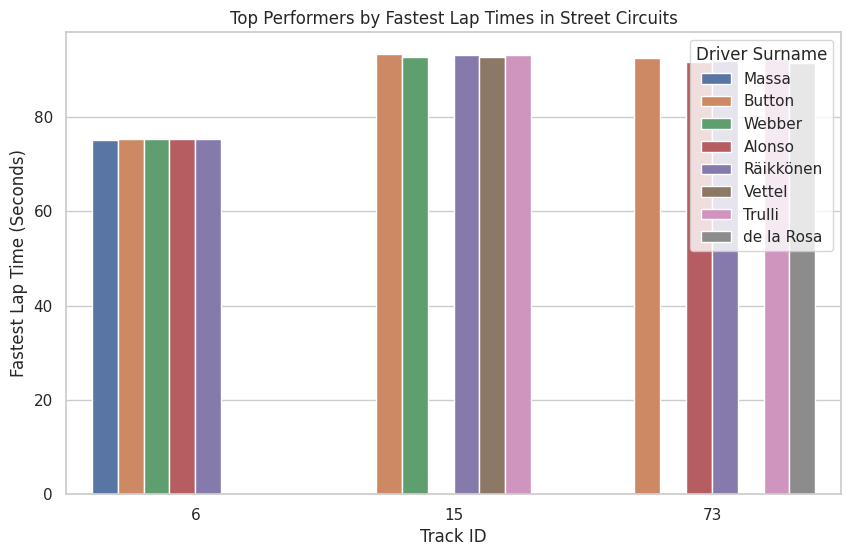

In [40]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_performers,
    x='raceId',
    y='fastestLapTimeSec',
    hue='surname',
    dodge=True
)
plt.title("Top Performers by Fastest Lap Times in Street Circuits")
plt.xlabel("Track ID")
plt.ylabel("Fastest Lap Time (Seconds)")
plt.legend(title="Driver Surname")
plt.show()

Street Circuits

*   Track ID: 6 is Monaco
*   Track ID: 15 is Singapore

*   Track ID: 73 is Azerbaijan



# Box-Jenkins models

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [42]:
circuits = pd.read_csv('circuits.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
constructors = pd.read_csv('constructors.csv')

df = results.merge(races, on='raceId').merge(circuits, on='circuitId').merge(constructors, on='constructorId')
df['date'] = pd.to_datetime(df['date'])

In [43]:
df['altitude_category'] = pd.cut(df['alt'], bins=[-float('inf'), 0, 500, 1000, float('inf')],
                                 labels=['Sea Level', 'Low', 'Medium', 'High'])

altitude_performance = df.groupby(['date', 'altitude_category'])['points'].mean().unstack()
altitude_performance = altitude_performance.fillna(0)

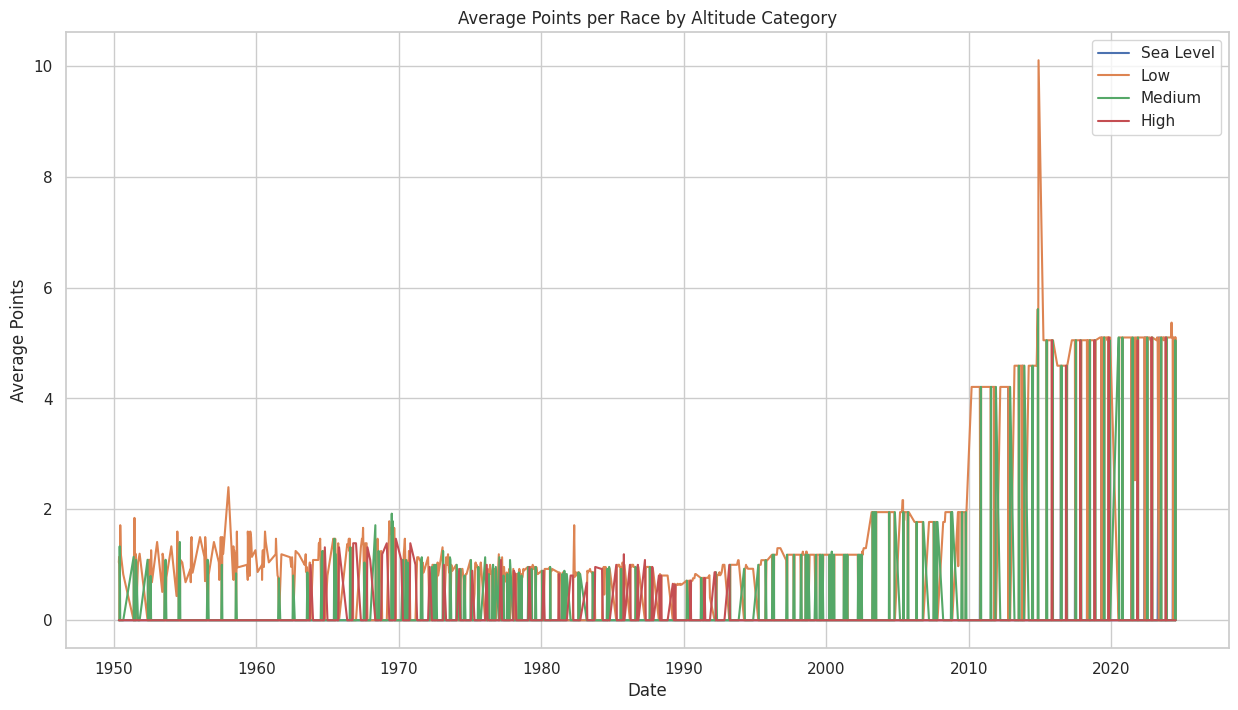

In [44]:
plt.figure(figsize=(15, 8))
for category in altitude_performance.columns:
    plt.plot(altitude_performance.index, altitude_performance[category], label=category)
plt.title('Average Points per Race by Altitude Category')
plt.xlabel('Date')
plt.ylabel('Average Points')
plt.legend()
plt.show()

The line plot illustrates the average points per race over time across different altitude categories: Sea Level, Low, Medium, and High. From the 1950s to the 1990s, the average points remained relatively low and stable across all altitude categories, with minimal variation. Starting in the early 2000s, there is a noticeable upward trend in average points, likely due to changes in the aerodynamics and development. From around 2010 onward, the average points for Low altitude races show a sharp increase, even spiking significantly at one point, indicating a notable performance variation in this category. The Medium and High altitude categories exhibit similar trends but remain relatively consistent and aligned, with a steady increase in points. The Sea Level category shows comparable performance, though with slightly lower variability. Overall, the plot highlights an improvement in race performance across all altitude categories in recent decades, with notable spikes in the Low altitude category, suggesting that environmental or track-specific factors may play a role in influencing results.

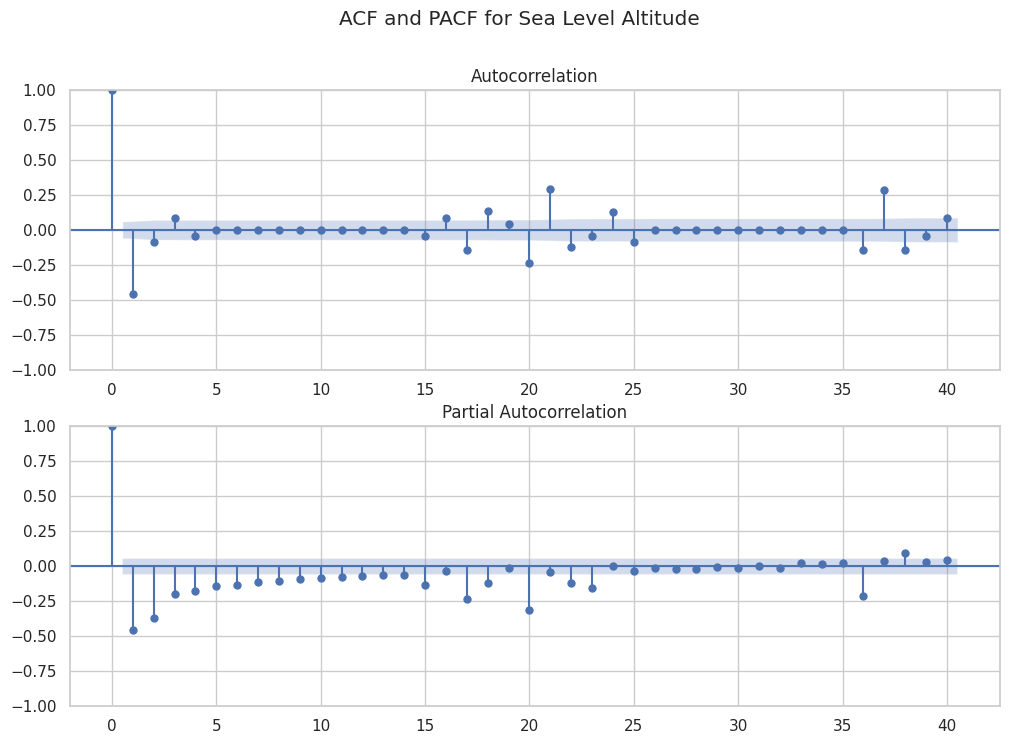

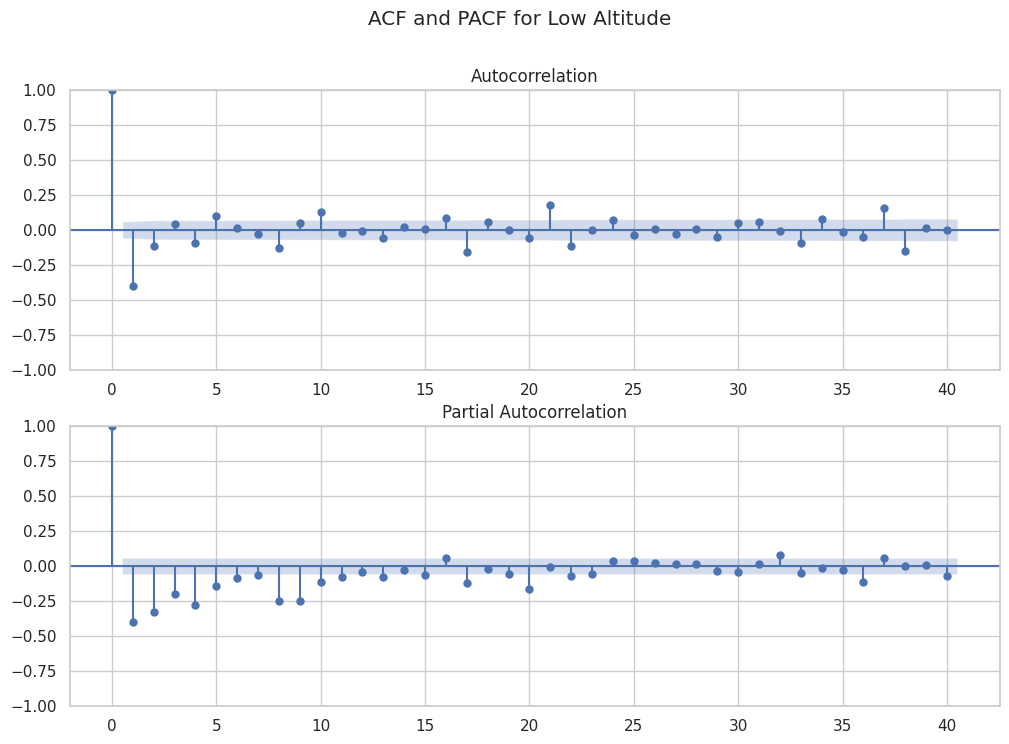

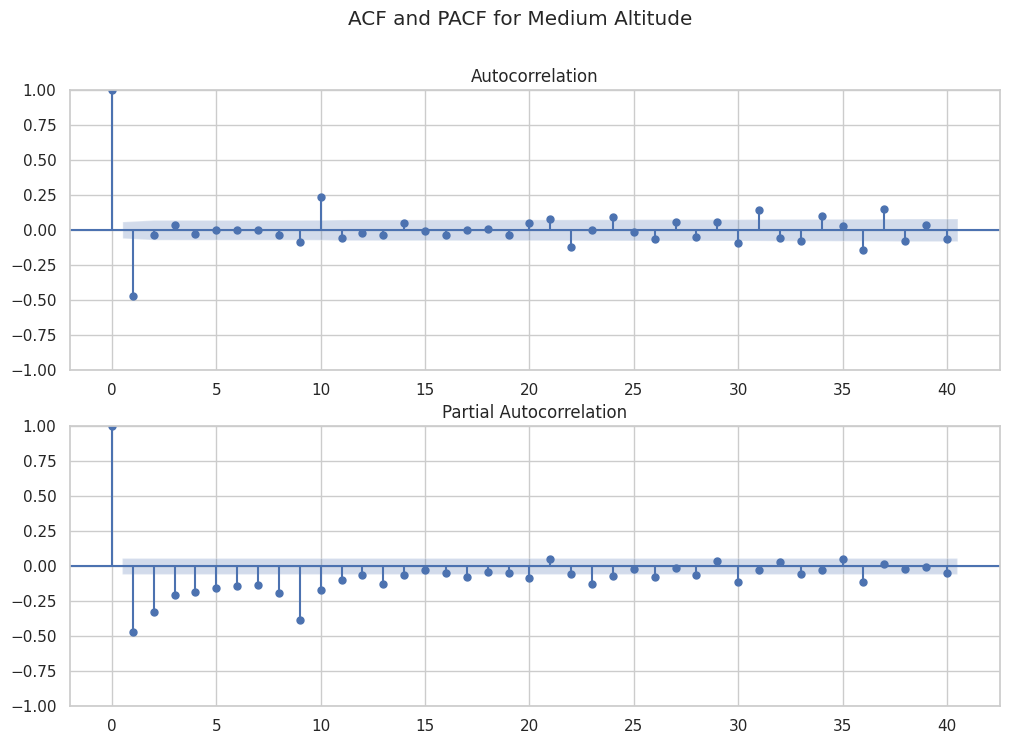

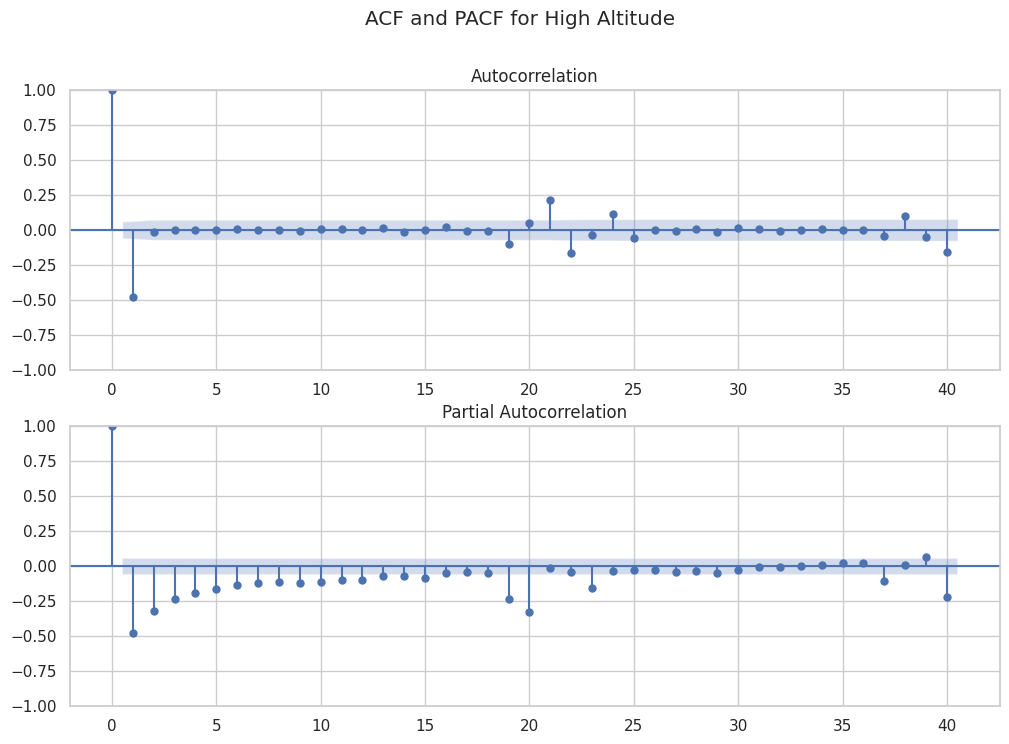

In [45]:
altitude_performance_diff = altitude_performance.diff().dropna()

for category in altitude_performance_diff.columns:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(altitude_performance_diff[category], ax=ax1, lags=40)
    plot_pacf(altitude_performance_diff[category], ax=ax2, lags=40)
    plt.suptitle(f'ACF and PACF for {category} Altitude')
    plt.show()

Individual Team performance with altitude

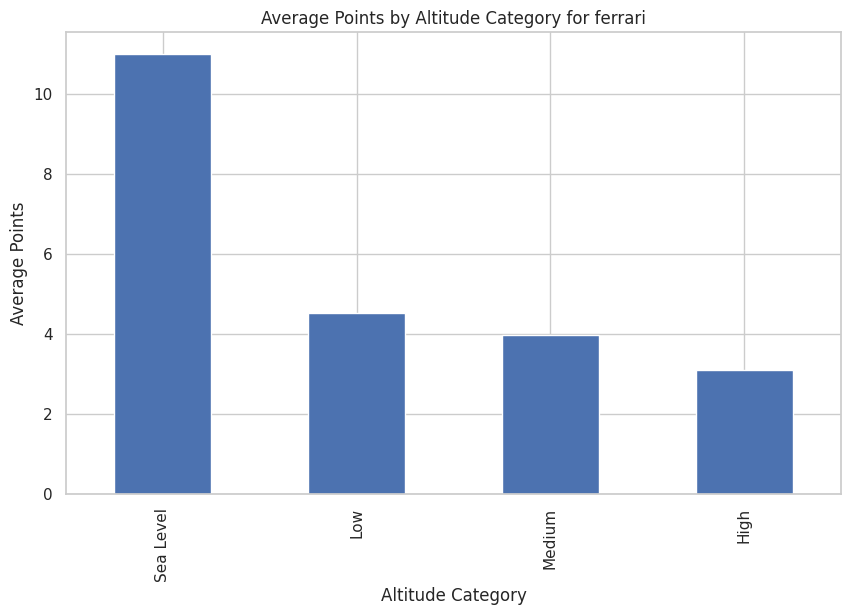

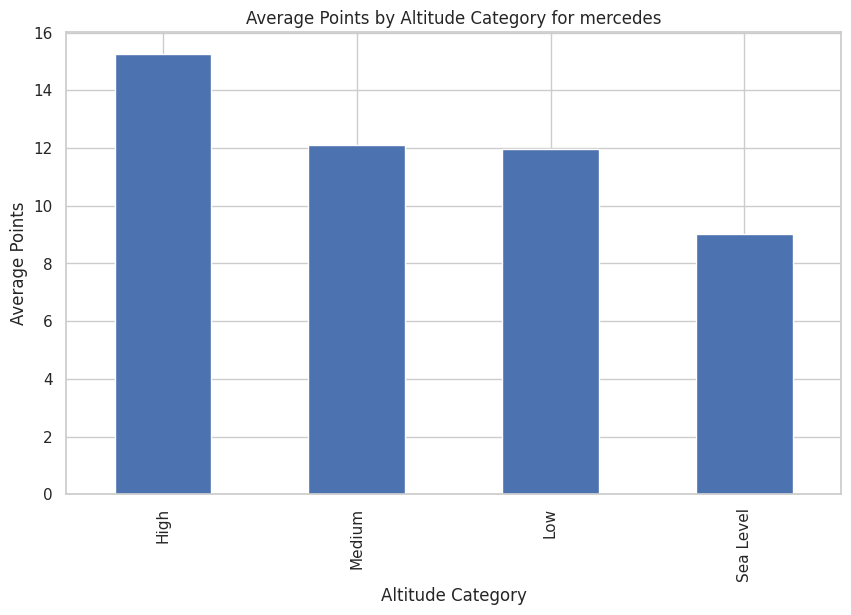

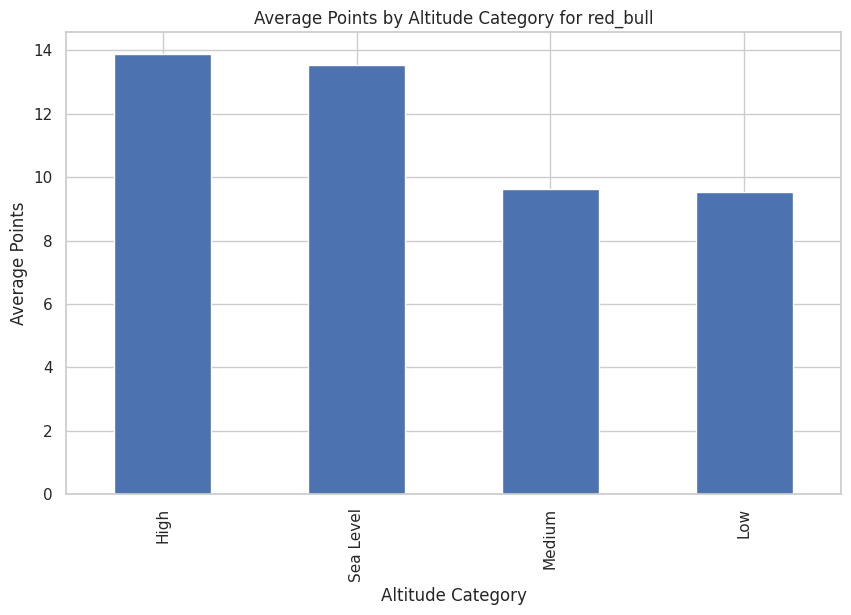

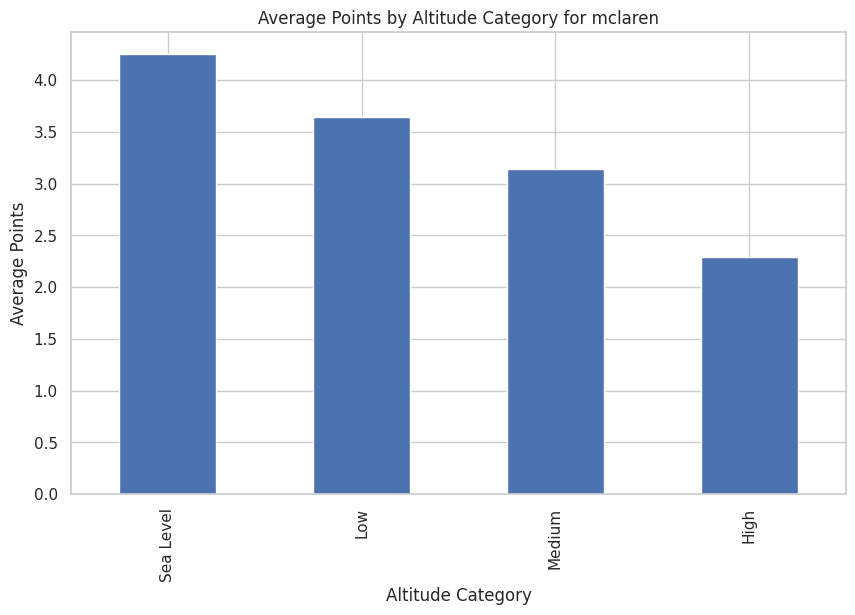

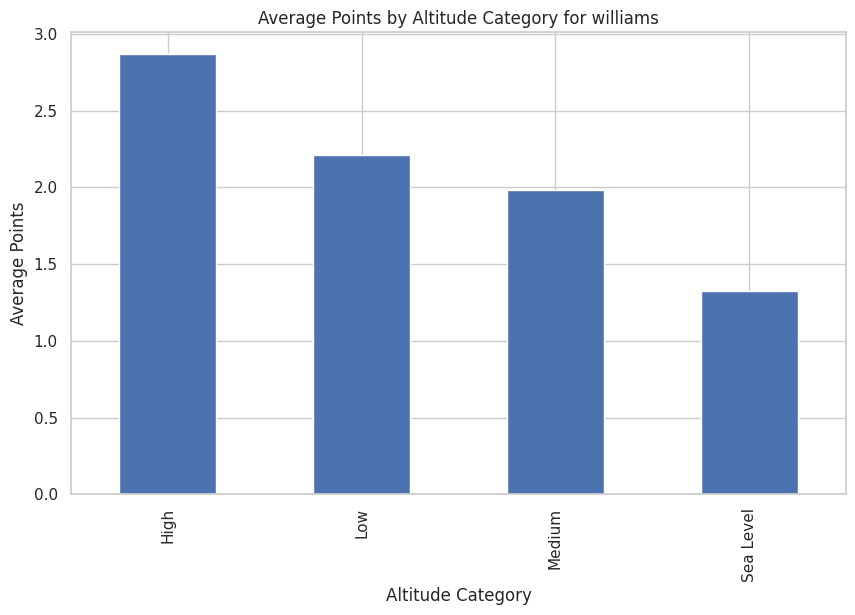

In [46]:
top_constructors = df.groupby('constructorRef')['points'].sum().nlargest(5).index

for constructor in top_constructors:
    constructor_data = df[df['constructorRef'] == constructor]
    altitude_perf = constructor_data.groupby('altitude_category')['points'].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    altitude_perf.plot(kind='bar')
    plt.title(f'Average Points by Altitude Category for {constructor}')
    plt.xlabel('Altitude Category')
    plt.ylabel('Average Points')
    plt.show()

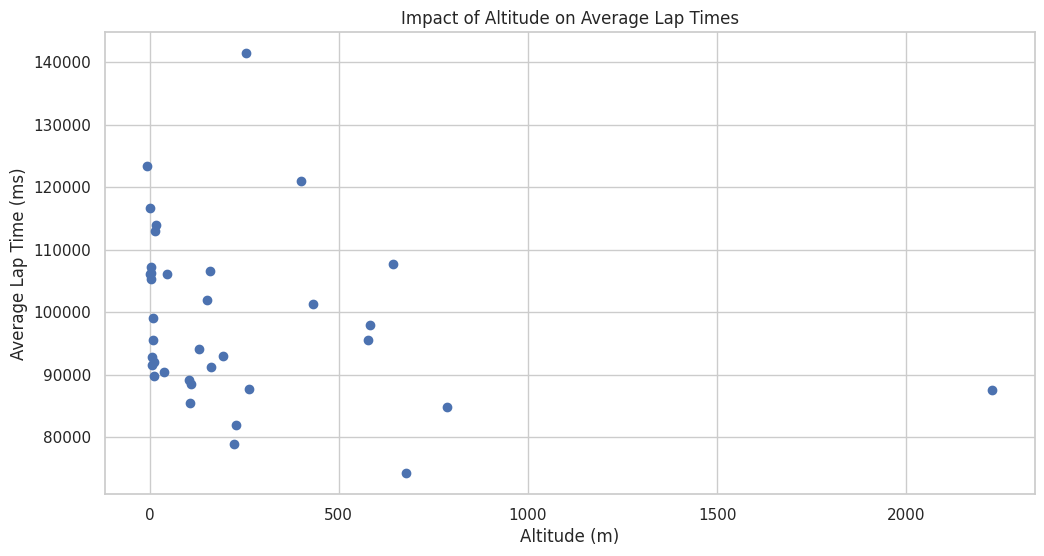

In [47]:
# Analyze the impact of altitude on lap times
lap_times = pd.read_csv('lap_times.csv')
df_lap_times = lap_times.merge(races, on='raceId').merge(circuits, on='circuitId')

altitude_lap_times = df_lap_times.groupby('alt')['milliseconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(altitude_lap_times['alt'], altitude_lap_times['milliseconds'])
plt.title('Impact of Altitude on Average Lap Times')
plt.xlabel('Altitude (m)')
plt.ylabel('Average Lap Time (ms)')
plt.show()

## **Predicting the points scored by the drivers in the future seasons**

In [48]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima  # Auto-ARIMA to find optimal parameters
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
results_file_path = '/content/results.csv'
races_file_path = '/content/races.csv'
results_df = pd.read_csv(results_file_path)
races_df = pd.read_csv(races_file_path)

if 'date' in races_df.columns:
    races_df['year'] = pd.to_datetime(races_df['date']).dt.year
results_with_year = results_df.merge(races_df[['raceId', 'year']], on='raceId', how='left')
driver_points = results_with_year.groupby(['driverId', 'year'])['points'].sum().reset_index()
top_drivers = driver_points.groupby('driverId')['points'].sum().nlargest(3).index
top_driver_points = driver_points[driver_points['driverId'].isin(top_drivers)]

Finding best ARIMA parameters for Driver ID: 1
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=256.925, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=216.162, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=217.911, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=217.946, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=219.581, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=215.769, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=227.262, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=217.733, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=217.744, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=222.108, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=219.337, Time=0.17 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.113 seco

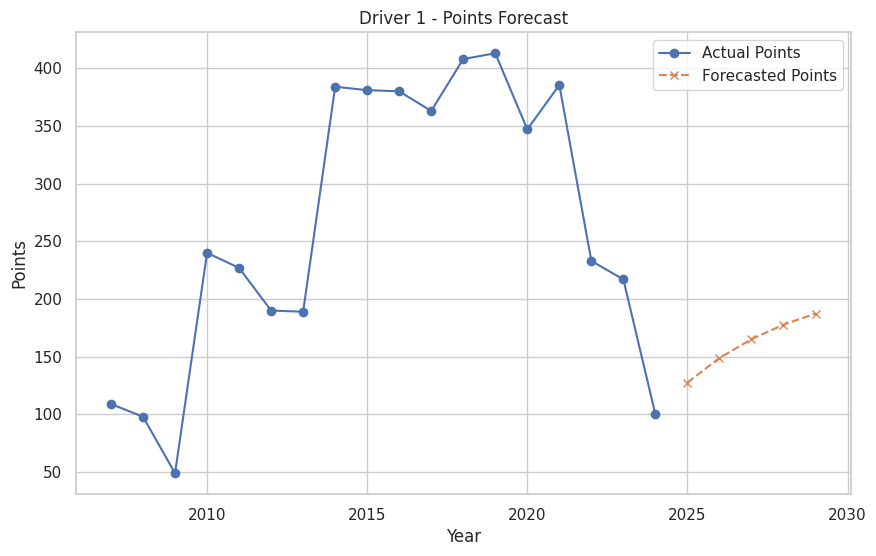

Forecasted Points for Driver ID 1:
     Year  Forecasted Points
18  2025         127.639762
19  2026         148.883271
20  2027         165.210715
21  2028         177.759744
22  2029         187.404740
Finding best ARIMA parameters for Driver ID: 20
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=222.029, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=201.294, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=214.430, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=202.802, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=202.996, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=203.644, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=201.178, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=205.677, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=203.154, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=203.169, Time=0.0

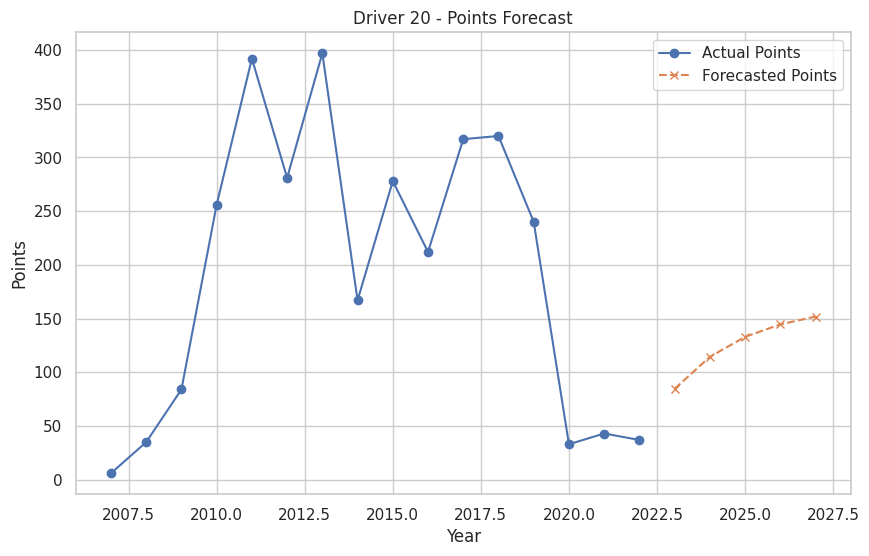

Forecasted Points for Driver ID 20:
     Year  Forecasted Points
16  2023          84.608998
17  2024         114.363651
18  2025         132.959704
19  2026         144.581857
20  2027         151.845467
Finding best ARIMA parameters for Driver ID: 830
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=144.782, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=131.098, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=132.693, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=132.846, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=134.428, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=130.124, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=130.179, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=132.069, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=132.108, Time=0.11 

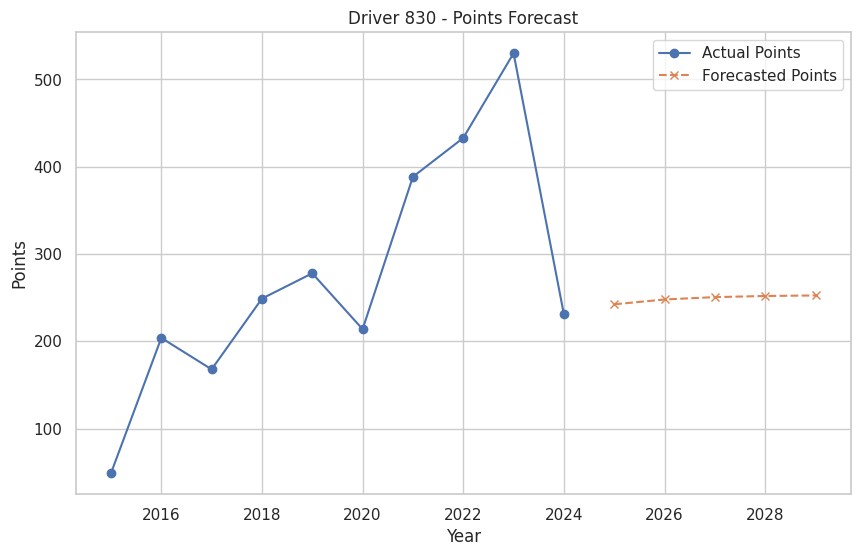

Forecasted Points for Driver ID 830:
     Year  Forecasted Points
10  2025         242.467474
11  2026         248.016381
12  2027         250.701398
13  2028         252.000631
14  2029         252.629306


In [50]:
def forecast_driver_points(driver_id, data, forecast_years=5):
    driver_data = data[data['driverId'] == driver_id]
    driver_data = driver_data.set_index('year')['points'].sort_index()
    plt.figure(figsize=(10, 6))
    plt.plot(driver_data, label='Actual Points', marker='o')

    #Auto ARIMA
    print(f"Finding best ARIMA parameters for Driver ID: {driver_id}")
    auto_model = auto_arima(driver_data, seasonal=False, trace=True, suppress_warnings=True)
    print(f"Best ARIMA Model for Driver {driver_id}:", auto_model.order)
    model = ARIMA(driver_data, order=auto_model.order)
    model_fit = model.fit()
    future_years = list(range(driver_data.index[-1] + 1, driver_data.index[-1] + 1 + forecast_years))
    forecast = model_fit.forecast(steps=forecast_years)


    plt.plot(future_years, forecast, label='Forecasted Points', marker='x', linestyle='--')
    plt.title(f"Driver {driver_id} - Points Forecast")
    plt.xlabel("Year")
    plt.ylabel("Points")
    plt.legend()
    plt.grid(True)
    plt.show()

    forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted Points': forecast})
    print(f"Forecasted Points for Driver ID {driver_id}:\n", forecast_df)

for driver_id in top_drivers:
    forecast_driver_points(driver_id, top_driver_points)

In [71]:
print("Driver Series for ACF/PACF:")
print(driver_series)
print("Length of Series:", len(driver_series))

Driver Series for ACF/PACF:
year
2015     49.0
2016    204.0
2017    168.0
2018    249.0
2019    278.0
2020    214.0
2021    388.5
2022    433.0
2023    530.0
2024    231.0
Name: points, dtype: float64
Length of Series: 10


In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [53]:
def plot_acf_pacf(series, lags=20, title="Time Series"):
    series = series.dropna()
    if len(series) < 10:
        print("Error: Time series is too short for ACF/PACF plots.")
        return

    plt.figure(figsize=(12, 6))

    # ACF Plot
    plt.subplot(1, 2, 1)
    plot_acf(series, lags=min(lags, len(series) // 2), alpha=0.05, ax=plt.gca())
    plt.title(f"ACF Plot for {title}")

    # PACF Plot
    plt.subplot(1, 2, 2)
    plot_pacf(series, lags=min(lags, len(series) // 2), alpha=0.05, ax=plt.gca(), method='ywm')
    plt.title(f"PACF Plot for {title}")

    plt.tight_layout()
    plt.show()

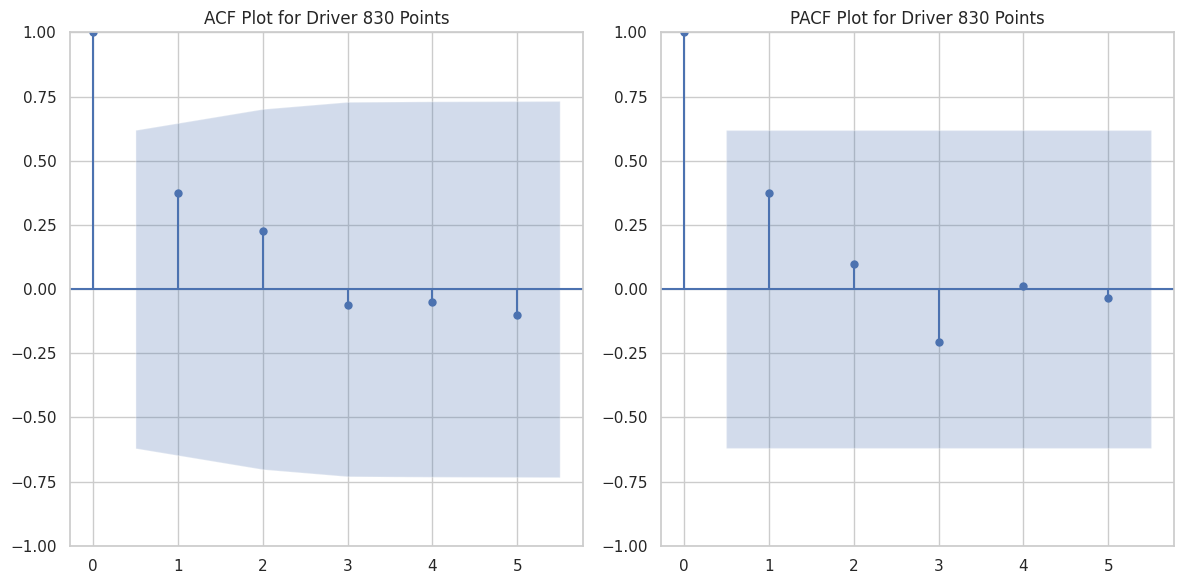

In [55]:
from statsmodels.tsa.stattools import adfuller

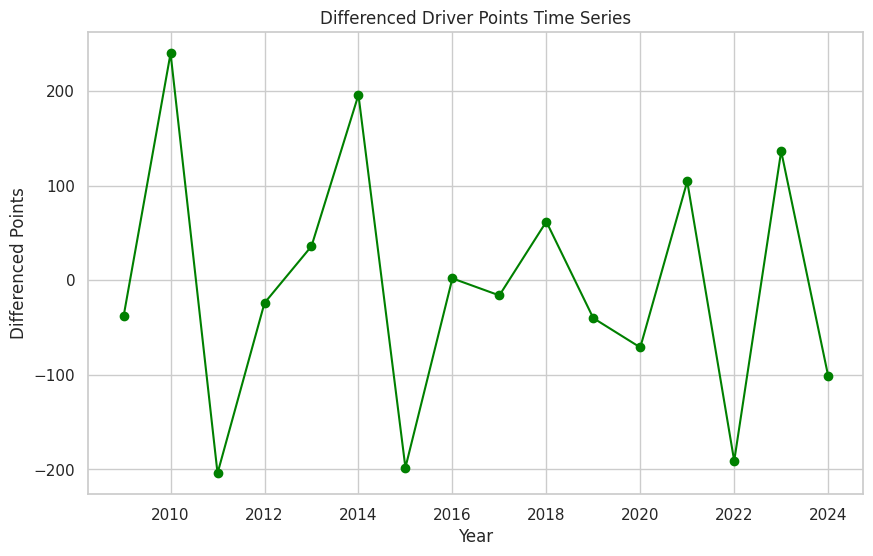


Performing ADF Test on Differenced Series...
=== Augmented Dickey-Fuller Test: First-Order Differenced Driver Points ===
ADF Statistic: -2.9778382275197983
p-value: 0.037016504557022434
# Lags Used: 3
# Observations Used: 12
Result: The series is stationary (reject the null hypothesis).


In [70]:
def adf_test(series, title=""):
    print(f"=== Augmented Dickey-Fuller Test: {title} ===")
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used']
    for value, label in zip(result[:4], labels):
        print(f"{label}: {value}")

    if result[1] <= 0.05:
        print("Result: The series is stationary (reject the null hypothesis).")
    else:
        print("Result: The series is not stationary (fail to reject the null hypothesis).")

differenced_data = driver_data.diff().diff().dropna() #differencing

plt.figure(figsize=(10, 6))
plt.plot(differenced_data, marker='o', linestyle='-', color='green')
plt.title("Differenced Driver Points Time Series")
plt.xlabel("Year")
plt.ylabel("Differenced Points")
plt.grid(True)
plt.show()

print("\nPerforming ADF Test on Differenced Series...")
adf_test(differenced_data, title="First-Order Differenced Driver Points")

In [69]:

# Auto-ARIMA to determine optimal parameters
auto_model = auto_arima(driver_data, seasonal=False, trace=True, suppress_warnings=True)

# Best parameters
print("Best ARIMA order:", auto_model.order)

# Fit ARIMA model with identified parameters
model = ARIMA(driver_data, order=auto_model.order)
model_fit = model.fit()
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=256.925, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=216.162, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=217.911, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=217.946, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=219.581, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=215.769, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=227.262, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=217.733, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=217.744, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=222.108, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=219.337, Time=0.21 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.966 seconds
Best ARIMA order: (1, 0, 0)
               

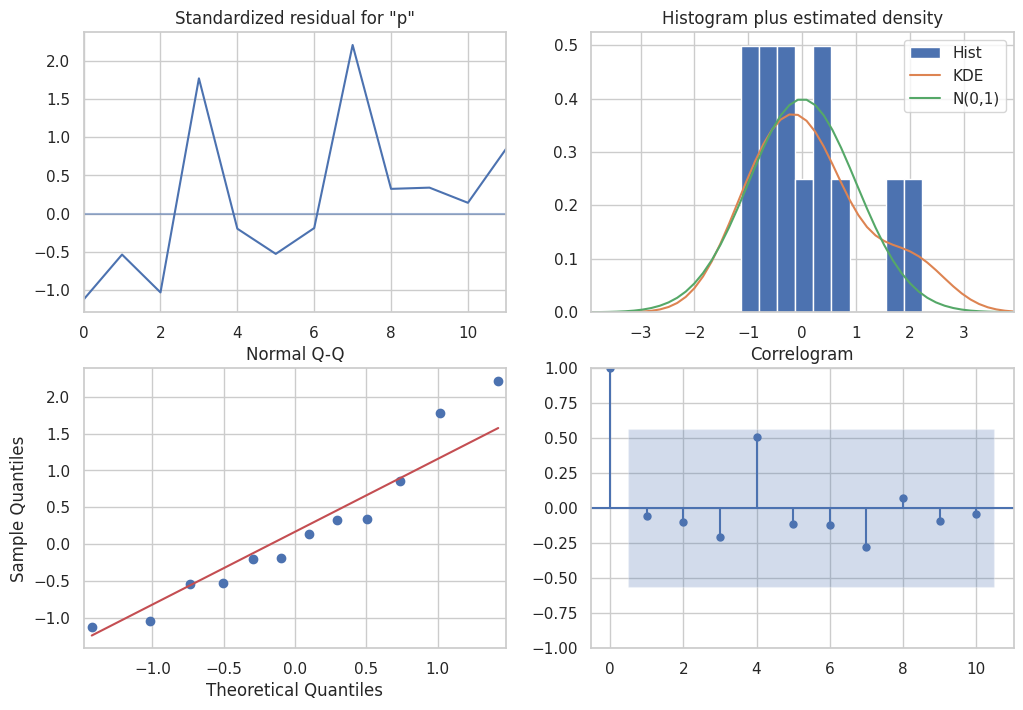

In [68]:
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error
import numpy as np

test_forecast = model_fit.forecast(steps=len(driver_data))
rmse = np.sqrt(mean_squared_error(driver_data, test_forecast))
print("RMSE:", rmse)

RMSE: 144.97441933976012


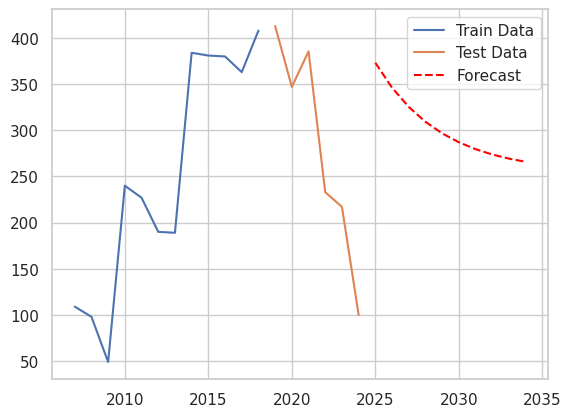

In [66]:
# Forecast future points
future_steps = 10
forecast = model_fit.forecast(steps=future_steps)

# Plot results
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(range(test_data.index[-1] + 1, test_data.index[-1] + 1 + future_steps),
         forecast, label='Forecast', linestyle='--', color='red')
plt.legend()
plt.show()

In [61]:
results_file_path = '/content/results.csv'
races_file_path = '/content/races.csv'

# Load results and races data
results_df = pd.read_csv(results_file_path)
races_df = pd.read_csv(races_file_path)

# Merge results with races to include 'year'
if 'date' in races_df.columns:
    races_df['year'] = pd.to_datetime(races_df['date']).dt.year

results_with_year = results_df.merge(races_df[['raceId', 'year']], on='raceId', how='left')

# Aggregate points per driver per year
driver_points = results_with_year.groupby(['driverId', 'year'])['points'].sum().reset_index()

# Step 2: Select a driver based on their driver ID
driver_id = 1  # Specify the driver ID here
driver_data = driver_points[driver_points['driverId'] == driver_id]
driver_data = driver_data.set_index('year')['points'].sort_index()

In [62]:
def adf_test(series, title=""):
    print(f"\n=== Augmented Dickey-Fuller Test: {title} ===")
    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] <= 0.05:
        print("The series is stationary (reject the null hypothesis).")
    else:
        print("The series is NOT stationary (fail to reject the null hypothesis).")

print("Original Series Stationarity Test:")
adf_test(driver_data, title="Driver Points")

# If non-stationary, apply differencing
if adfuller(driver_data, autolag='AIC')[1] > 0.05:
    driver_data_diff = driver_data.diff().dropna()
    print("\nDifferenced Series Stationarity Test:")
    adf_test(driver_data_diff, title="Differenced Driver Points")
    differenced_data = driver_data_diff
else:
    differenced_data = driver_data

Original Series Stationarity Test:

=== Augmented Dickey-Fuller Test: Driver Points ===
ADF Statistic: -1.3908
p-value: 0.5867
The series is NOT stationary (fail to reject the null hypothesis).

Differenced Series Stationarity Test:

=== Augmented Dickey-Fuller Test: Differenced Driver Points ===
ADF Statistic: 0.7841
p-value: 0.9914
The series is NOT stationary (fail to reject the null hypothesis).


In [63]:
print("\nFinding best ARIMA parameters using Auto ARIMA...")
auto_model = auto_arima(driver_data, seasonal=False, trace=True, suppress_warnings=True)
print(f"Best ARIMA Model Order: {auto_model.order}")

# Step 6: Train the ARIMA model
train_size = int(len(driver_data) * 0.7)
train_data = driver_data.iloc[:train_size]
test_data = driver_data.iloc[train_size:]

print("\nTraining ARIMA model...")
model = ARIMA(train_data, order=auto_model.order)
model_fit = model.fit()
print(model_fit.summary())

# Step 7: Forecast on Test Data and Evaluate
test_forecast = model_fit.forecast(steps=len(test_data))
rmse = np.sqrt(mean_squared_error(test_data, test_forecast))
print(f"\nRMSE on Test Data: {rmse:.4f}")

# Step 8: Forecast Future Points (e.g., next 6 years)
future_steps = 6
future_years = list(range(driver_data.index[-1] + 1, driver_data.index[-1] + 1 + future_steps))
future_forecast = model_fit.forecast(steps=future_steps)


Finding best ARIMA parameters using Auto ARIMA...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=256.925, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=216.162, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=217.911, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=217.946, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=219.581, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=215.769, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=227.262, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=217.733, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=217.744, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=222.108, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=219.337, Time=0.18 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.988 

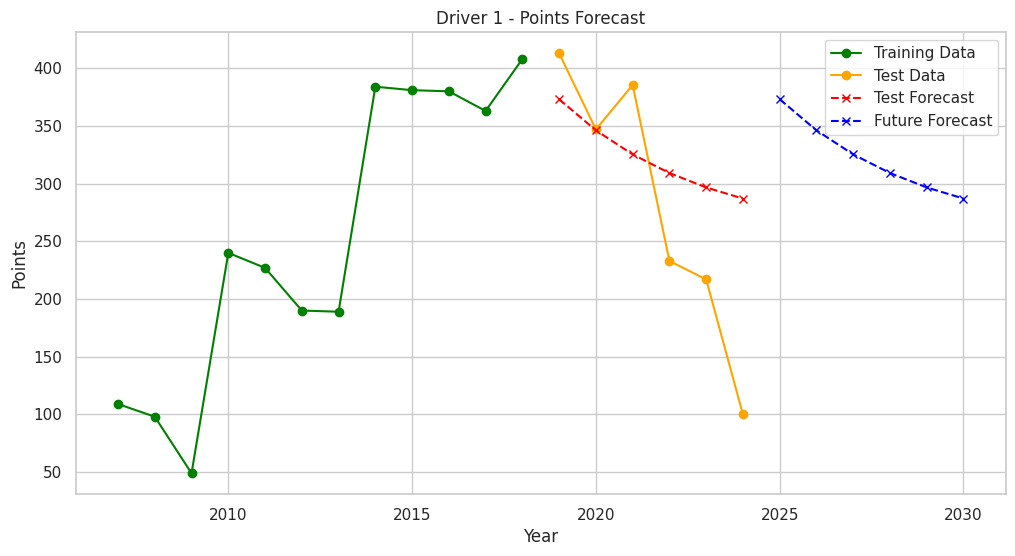


Future Forecasted Points:
    Year  Forecasted Points
12  2025         373.151563
13  2026         346.191156
14  2027         325.333302
15  2028         309.196675
16  2029         296.712613
17  2030         287.054348


In [64]:
# Step 9: Plot Actual, Test, and Forecasted Points
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data', color='green', marker='o')
plt.plot(test_data.index, test_data, label='Test Data', color='orange', marker='o')
plt.plot(test_data.index, test_forecast, label='Test Forecast', linestyle='--', color='red', marker='x')
plt.plot(future_years, future_forecast, label='Future Forecast', linestyle='--', color='blue', marker='x')
plt.title(f"Driver {driver_id} - Points Forecast")
plt.xlabel("Year")
plt.ylabel("Points")
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Display Future Forecast
future_forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted Points': future_forecast})
print("\nFuture Forecasted Points:")
print(future_forecast_df)

Comparing 3 difff models  



Training ARIMA...
ARIMA RMSE: 172.4654


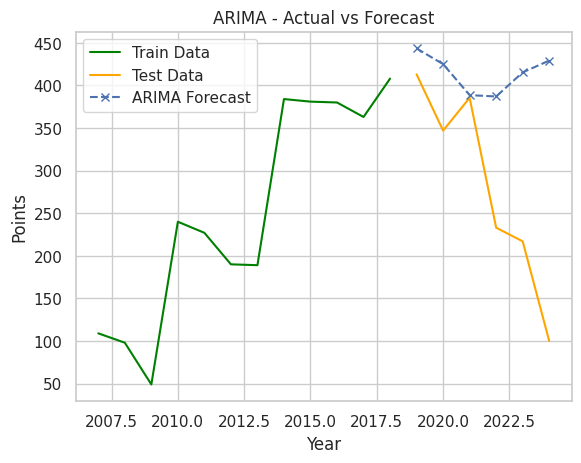


Training SARIMA...
SARIMA RMSE: 280.6078


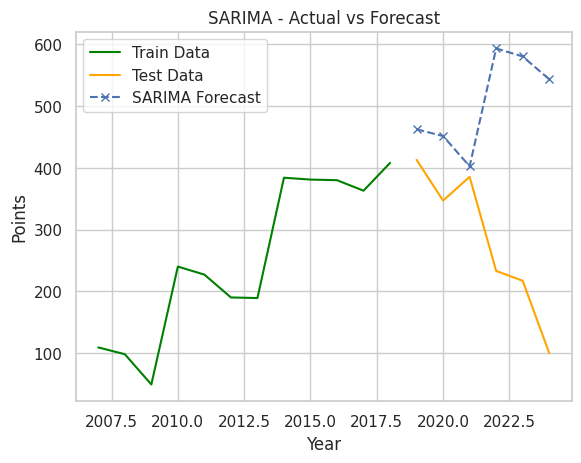


Training ARMA...
ARMA RMSE: 90.7833


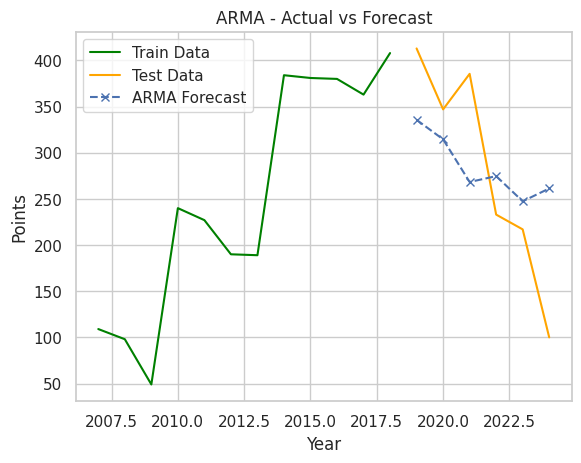


Model Performance Comparison:
ARIMA: RMSE = 172.4654
SARIMA: RMSE = 280.6078
ARMA: RMSE = 90.7833

Best Performing Model: ARMA with RMSE = 90.7833


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Step 1: Load and prepare the data
results_file_path = '/content/results.csv'
races_file_path = '/content/races.csv'

# Load results and races data
results_df = pd.read_csv(results_file_path)
races_df = pd.read_csv(races_file_path)

# Merge results with races to include 'year'
if 'date' in races_df.columns:
    races_df['year'] = pd.to_datetime(races_df['date']).dt.year

results_with_year = results_df.merge(races_df[['raceId', 'year']], on='raceId', how='left')

# Aggregate points per driver per year
driver_id = 1  # Choose the driver ID
driver_points = results_with_year.groupby(['driverId', 'year'])['points'].sum().reset_index()
driver_data = driver_points[driver_points['driverId'] == driver_id]
driver_data = driver_data.set_index('year')['points'].sort_index()

# Step 2: Train-Test Split
train_size = int(len(driver_data) * 0.7)
train_data = driver_data.iloc[:train_size]
test_data = driver_data.iloc[train_size:]

# Step 3: Define a function to evaluate models
def evaluate_model(model_name, model, train, test, **kwargs):
    print(f"\nTraining {model_name}...")
    if model_name == 'SARIMA':  # Seasonal model needs extra parameters
        model_fit = model(train, **kwargs).fit(disp=False)
    else:
        model_fit = model(train, **kwargs).fit()

    # Forecast on test data
    forecast = model_fit.forecast(steps=len(test))
    rmse = np.sqrt(mean_squared_error(test, forecast))
    print(f"{model_name} RMSE: {rmse:.4f}")

    # Plot the actual vs forecast
    plt.plot(train, label='Train Data', color='green')
    plt.plot(test.index, test, label='Test Data', color='orange')
    plt.plot(test.index, forecast, label=f'{model_name} Forecast', linestyle='--', marker='x')
    plt.title(f"{model_name} - Actual vs Forecast")
    plt.xlabel("Year")
    plt.ylabel("Points")
    plt.legend()
    plt.show()

    return rmse

# Step 4: Compare Models

# ARIMA Model
arima_rmse = evaluate_model(
    "ARIMA", ARIMA, train_data, test_data, order=(2, 1, 2)
)

# SARIMA Model (Seasonal ARIMA)
sarima_rmse = evaluate_model(
    "SARIMA", SARIMAX, train_data, test_data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12)
)

# ARMA Model
arma_rmse = evaluate_model(
    "ARMA", ARIMA, train_data, test_data, order=(2, 0, 2)  # ARMA is ARIMA with d=0
)

# Step 5: Compare RMSE
model_rmse = {
    'ARIMA': arima_rmse,
    'SARIMA': sarima_rmse,
    'ARMA': arma_rmse
}

best_model = min(model_rmse, key=model_rmse.get)
print("\nModel Performance Comparison:")
for model, rmse in model_rmse.items():
    print(f"{model}: RMSE = {rmse:.4f}")

print(f"\nBest Performing Model: {best_model} with RMSE = {model_rmse[best_model]:.4f}")


In [ ]:
References: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020